In [1]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   Parse_HistoricalTradingData.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	.DS_Store
	SETSMART Database/
	__pycache__/
	dataset.py

no changes added to commit (use "git add" and/or "git commit -a")


In [2]:
import os, os.path
HOME = os.path.join(".", '[SETSmart] SET100 Prices 2015-2019', 'SET100_Data')
os.chdir(HOME)

In [3]:
!ls

AAV	BCP	KBANK  MAJOR  OSP    PTT     RS     SPALI  TCAP   TOA	 TVO
AEONTS	BCPG	KCE    MBK    PLANB  PTTEP   SAWAD  SPRC   THAI   TOP	 WHA
AMATA	BDMS	KKP    MEGA   PRM    PTTGC   SCB    STA    THANI  TPIPP
ANAN	BEAUTY	KTB    MINT   PSH    QH      SCC    STEC   TISCO  TRUE
AP	JAS	KTC    MTC    PSL    RATCH   SGP    SUPER  TKN	  TTW
BCH	JMT	LH     ORI    PTG    ROBINS  SIRI   TASCO  TMB	  TU


In [4]:
from dataset import HistoricalTrading

In [5]:
# For each stock data, extract Historical Trading excel file.

def check_historical_trade_data(symbols):
    ht_list = []
    for symbol in symbols:
        try:
            print("{} Data: {}".format(symbol, os.listdir(symbol)))
            htdata = HistoricalTrading(symbol)
            print(htdata.workbook.sheet_names())
            ht_list.append(htdata)
        except FileNotFoundError as e:
            print(symbol, "::" , str(e))
    
    return ht_list
        
# Check data for 5 stocks
print("Checking dataset: Historical Trading")
ht_dataset = check_historical_trade_data(os.listdir()[:3])

Checking dataset: Historical Trading
TOP ['HistoricalTrading.xlsx', 'TOP.png', '18011865.zip', '17010478.zip', '16009070.zip', '19012990.zip', '15009308.zip']
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to

In [6]:
# https://github.com/python-excel/xlrd No maintainer
import xlrd
wb = xlrd.open_workbook("TOP/HistoricalTrading.xlsx")
sh = wb.sheet_by_index(0)


def extract_meta(worksheet):
    val = worksheet.cell_value(rowx=0, colx=0)
    print(val)
extract_meta(sh)

# sh.row(0)[0:3] # [text:'Historical Trading', text:'', text:'05/09/19 18:49:59']

# Symbol meta
sh.row(2)[1] 
for i in range(2,9):
    print(sh.row(i)[0:2])

Historical Trading
[text:'Symbol', text:'TOP']
[text:'Adjusted Price:', text:'Yes']
[text:'Trading Method:', text:'All']
[text:'Period :', text:'Daily']
[text:'Form:', xldate:41768.0000462963]
[text:'to :', xldate:43564.0000462963]
[empty:'', empty:'']


In [7]:
# Symbol
for i in range(9,sh.nrows):
    print(sh.row(i)[0:2])

[text:'THAI OIL PUBLIC COMPANY LIMITED', text:'TOP']
[text:'18:49:38', number:69.75]
[text:'Market :', text:'SET']
[text:'SET', number:1669.79]
[text:'Index :', text:'SET50']
[text:'SET50', number:1108.91]
[empty:'', empty:'']
[text:'Summary', empty:'']
[text:'', text:'1221 days']
[text:'High (25/10/17)', number:110.0]
[text:'Low (16/12/14)', number:41.0]
[text:'Average Price', number:70.64236761755824]
[text:'Transaction', number:3378858.0]
[text:'TR Volume (k.Shares)', number:245200.619]
[text:'TR Value (M.Baht)', number:18131.451984979998]
[text:'Total Volume (k.Shares)', number:8989521.333]
[text:'Total Value (M.Baht)', number:635852.0823344802]
[text:'NVDR Net Value (M.Baht)', number:17766.03022678]
[empty:'', empty:'']
[text:'Transaction', empty:'']
[text:'Date', text:'Prior']
[xldate:43712.0000462963, number:66.5]
[xldate:43711.0000462963, number:66.75]
[xldate:43710.0000462963, number:67.75]
[xldate:43707.0000462963, number:68.0]
[xldate:43706.0000462963, number:62.25]
[xldate:

In [8]:
# Find start date
for i, d in enumerate(sh.col(0)):
    print(i, d)

0 text:'Historical Trading'
1 empty:''
2 text:'Symbol'
3 text:'Adjusted Price:'
4 text:'Trading Method:'
5 text:'Period :'
6 text:'Form:'
7 text:'to :'
8 empty:''
9 text:'THAI OIL PUBLIC COMPANY LIMITED'
10 text:'18:49:38'
11 text:'Market :'
12 text:'SET'
13 text:'Index :'
14 text:'SET50'
15 empty:''
16 text:'Summary'
17 text:''
18 text:'High (25/10/17)'
19 text:'Low (16/12/14)'
20 text:'Average Price'
21 text:'Transaction'
22 text:'TR Volume (k.Shares)'
23 text:'TR Value (M.Baht)'
24 text:'Total Volume (k.Shares)'
25 text:'Total Value (M.Baht)'
26 text:'NVDR Net Value (M.Baht)'
27 empty:''
28 text:'Transaction'
29 text:'Date'
30 xldate:43712.0000462963
31 xldate:43711.0000462963
32 xldate:43710.0000462963
33 xldate:43707.0000462963
34 xldate:43706.0000462963
35 xldate:43705.0000462963
36 xldate:43704.0000462963
37 xldate:43703.0000462963
38 xldate:43700.0000462963
39 xldate:43699.0000462963
40 xldate:43698.0000462963
41 xldate:43697.0000462963
42 xldate:43696.0000462963
43 xldate:4369

761 xldate:42622.0000462963
762 xldate:42621.0000462963
763 xldate:42620.0000462963
764 xldate:42619.0000462963
765 xldate:42618.0000462963
766 xldate:42615.0000462963
767 xldate:42614.0000462963
768 xldate:42613.0000462963
769 xldate:42612.0000462963
770 xldate:42611.0000462963
771 xldate:42608.0000462963
772 xldate:42607.0000462963
773 xldate:42606.0000462963
774 xldate:42605.0000462963
775 xldate:42604.0000462963
776 xldate:42601.0000462963
777 xldate:42600.0000462963
778 xldate:42599.0000462963
779 xldate:42598.0000462963
780 xldate:42597.0000462963
781 xldate:42593.0000462963
782 xldate:42592.0000462963
783 xldate:42591.0000462963
784 xldate:42590.0000462963
785 xldate:42587.0000462963
786 xldate:42586.0000462963
787 xldate:42585.0000462963
788 xldate:42584.0000462963
789 xldate:42583.0000462963
790 xldate:42580.0000462963
791 xldate:42579.0000462963
792 xldate:42578.0000462963
793 xldate:42577.0000462963
794 xldate:42576.0000462963
795 xldate:42573.0000462963
796 xldate:42572.000

In [9]:
# Header at row 29
sh.row(29)


[text:'Date',
 text:'Prior',
 text:'Open',
 text:'High',
 text:'Low',
 text:'Close',
 text:'Change',
 text:'%Change',
 text:'Average',
 text:'Bid',
 text:'Offer',
 text:'AOM Volume (k.Shares)',
 text:'AOM Value (M.Baht)',
 text:'TR Volume (k.Shares)',
 text:'TR Value (M.Baht)',
 text:'Total Volume (k.Shares)',
 text:'Total Value (M.Baht)',
 text:'P/E',
 text:'PEG',
 text:'P/BV',
 text:'BVPS (Baht)',
 text:'%Dividend Yield',
 text:'%12M Dividend Yield',
 text:'Market Cap. (M.Baht)',
 text:'%Volume Turnover',
 text:'Par (Baht)',
 text:'Listed Shares',
 text:'Trading Sign',
 text:'Benefit Sign']

In [10]:
# Data starts from row 30
sh.row(30)

[xldate:43712.0000462963,
 number:66.5,
 number:66.75,
 number:69.0,
 number:66.25,
 number:68.25,
 number:1.75,
 number:2.6315789473684212,
 number:67.8509771267526,
 number:68.25,
 number:68.5,
 number:11318.9,
 number:767.998425,
 number:92.6,
 number:6.2314,
 number:11412.271,
 number:774.2818945,
 number:29.49,
 number:-0.36,
 number:1.15,
 number:59.39,
 number:3.880000114440918,
 number:3.88,
 number:139231.90233225,
 number:0.5600000023841858,
 number:10.0,
 number:2040027873.0,
 text:'-',
 text:'-']

In [11]:
import pandas as pd

data_rows = []



for k in range(30, sh.nrows):
    # Check row-level correctness
    # Each data row should have 29 values
    assert(len(sh.row(k))==29)
    data_rows.append(sh.row(k))

# Header label at row 29th
headers = [hname.value for hname in sh.row(29)]

# Create dataframe
df = pd.DataFrame(data_rows, columns=headers)

df = df[:-3] # Remove last three lines
df

Date         Prior          Open          High  \
0     xldate:43712.0000462963   number:66.5  number:66.75   number:69.0   
1     xldate:43711.0000462963  number:66.75  number:66.75   number:67.5   
2     xldate:43710.0000462963  number:67.75  number:66.75   number:67.5   
3     xldate:43707.0000462963   number:68.0   number:67.5   number:68.0   
4     xldate:43706.0000462963  number:62.25   number:67.5  number:68.75   
...                       ...           ...           ...           ...   
1216  xldate:41893.0000462963  number:52.75  number:52.25   number:52.5   
1217  xldate:41892.0000462963   number:53.0   number:53.0   number:53.0   
1218  xldate:41891.0000462963   number:53.0   number:53.0  number:53.25   
1219  xldate:41890.0000462963  number:52.75   number:53.0  number:53.25   
1220  xldate:41887.0000462963   number:52.0  number:52.25   number:53.0   

               Low         Close        Change                      %Change  \
0     number:66.25  number:68.25   number:1.75    number:2.6315789473684212   
1      number:66.0   number:66.5  number:-0.25  number:-0.37453183520599254   
2      number:66.0  number:66.75   number:-1.0   number:-1.4760147601476015   
3     number:66.25  number:67.75  number:-0.25  number:-0.36764705882352944   
4     number:66.25   number:68.0   number:5.75     number:9.236947791164658   
...            ...           ...           ...                          ...   
1216   number:52.0   number:52.0  number:-0.75   number:-1.4218009478672986   
1217   number:52.5  number:52.75  number:-0.25   number:-0.4716981132075472   
1218  number:52.75   number:53.0    number:0.0                   number:0.0   
1219   number:52.5   number:53.0   number:0.25   number:0.47393364928909953   
1220   number:52.0  number:52.75   number:0.75    number:1.4423076923076923   

                        Average           Bid  ...         P/BV   BVPS (Baht)  \
0       number:67.8509771267526  number:68.25  ...  number:1.15  number:59.39   
1        number:66.814792541598   number:66.5  ...  number:1.12  number:59.39   
2       number:66.7637944785276  number:66.75  ...  number:1.12  number:59.39   
3      number:67.27659701492537   number:67.5  ...  number:1.14  number:59.39   
4      number:67.63710975948312  number:67.75  ...  number:1.15  number:59.39   
...                         ...           ...  ...          ...           ...   
1216    number:52.1353055916775   number:52.0  ...  number:1.15  number:45.33   
1217  number:52.809310076885325  number:52.75  ...  number:1.16  number:45.33   
1218   number:52.96092574866676   number:53.0  ...  number:1.17  number:45.33   
1219  number:52.885930958211546   number:53.0  ...  number:1.17  number:45.33   
1220   number:52.51529905369373  number:52.75  ...  number:1.16  number:45.33   

                %Dividend Yield %12M Dividend Yield    Market Cap. (M.Baht)  \
0      number:3.880000114440918         number:3.88  number:139231.90233225   
1     number:3.9800000190734863         number:3.98   number:135661.8535545   
2     number:3.9700000286102295         number:3.97  number:136171.86052275   
3     number:3.9100000858306885         number:3.91  number:138211.88839575   
4     number:3.9000000953674316          number:3.9    number:138721.895364   
...                         ...                 ...                     ...   
1216   number:4.420000076293945            text:'-'    number:106081.449396   
1217   number:4.360000133514404            text:'-'  number:107611.47030075   
1218   number:4.340000152587891            text:'-'    number:108121.477269   
1219   number:4.340000152587891            text:'-'    number:108121.477269   
1220   number:4.360000133514404            text:'-'  number:107611.47030075   

                %Volume Turnover   Par (Baht)        Listed Shares  \
0      number:0.5600000023841858  number:10.0  number:2040027873.0   
1      number:0.4000000059604645  number:10.0  number:2040027873.0   
2      number:0.4000000059604645  number:10

In [12]:
# Format data point in the frame

# df['Date'].apply(fix_date)
# 
# df.Date.apply(fix_date)
# df['Prior'] = df.Prior.apply(lambda x: float(x.value))
# df['Open'] = df['Open'].apply(lambda x: float(x.value))

from dataset import ts_date, cell2float, ts_floats

df['Date'] = df.Date.apply(ts_date)

df = ts_floats(df, ['Prior', 'Open', 'High', 'Low', 'Close', 'Average', 'Change', '%Change'])

df = ts_floats(df, ['P/BV', 'Listed Shares', '%Volume Turnover'])

df = ts_floats(df, ['Total Volume (k.Shares)', 'P/E', 'Market Cap. (M.Baht)'])

df = ts_floats(df, ['Bid', 'Offer'])

df

Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't conv

Date  Prior   Open   High    Low  Close  Change   %Change  \
0    2019-09-04 00:00:04  66.50  66.75  69.00  66.25  68.25    1.75  2.631579   
1    2019-09-03 00:00:04  66.75  66.75  67.50  66.00  66.50   -0.25 -0.374532   
2    2019-09-02 00:00:04  67.75  66.75  67.50  66.00  66.75   -1.00 -1.476015   
3    2019-08-30 00:00:04  68.00  67.50  68.00  66.25  67.75   -0.25 -0.367647   
4    2019-08-29 00:00:04  62.25  67.50  68.75  66.25  68.00    5.75  9.236948   
...                  ...    ...    ...    ...    ...    ...     ...       ...   
1216 2014-09-11 00:00:04  52.75  52.25  52.50  52.00  52.00   -0.75 -1.421801   
1217 2014-09-10 00:00:04  53.00  53.00  53.00  52.50  52.75   -0.25 -0.471698   
1218 2014-09-09 00:00:04  53.00  53.00  53.25  52.75  53.00    0.00  0.000000   
1219 2014-09-08 00:00:04  52.75  53.00  53.25  52.50  53.00    0.25  0.473934   
1220 2014-09-05 00:00:04  52.00  52.25  53.00  52.00  52.75    0.75  1.442308   

        Average    Bid  ...  P/BV   BVPS (Baht)            %Dividend Yield  \
0     67.850977  68.25  ...  1.15  number:59.39   number:3.880000114440918   
1     66.814793  66.50  ...  1.12  number:59.39  number:3.9800000190734863   
2     66.763794  66.75  ...  1.12  number:59.39  number:3.9700000286102295   
3     67.276597  67.50  ...  1.14  number:59.39  number:3.9100000858306885   
4     67.637110  67.75  ...  1.15  number:59.39  number:3.9000000953674316   
...         ...    ...  ...   ...           ...                        ...   
1216  52.135306  52.00  ...  1.15  number:45.33   number:4.420000076293945   
1217  52.809310  52.75  ...  1.16  number:45.33   number:4.360000133514404   
1218  52.960926  53.00  ...  1.17  number:45.33   number:4.340000152587891   
1219  52.885931  53.00  ...  1.17  number:45.33   number:4.340000152587891   
1220  52.515299  52.75  ...  1.16  number:45.33   number:4.360000133514404   

     %12M Dividend Yield Market Cap. (M.Baht)  %Volume Turnover   Par (Baht)  \
0            number:3.88        139231.902332              0.56  number:10.0   
1            number:3.98        135661.853555              0.40  number:10.0   
2            number:3.97        136171.860523              0.40  number:10.0   
3            number:3.91        138211.888396              0.86  number:10.0   
4             number:3.9        138721.895364              1.94  number:10.0   
...                  ...                  ...               ...          ...   
1216            text:'-'        106081.449396              0.06  number:10.0   
1217            text:'-'        107611.470301              0.12  number:10.0   
1218            text:'-'        108121.477269              0.14  number:10.0   
1219            text:'-'        108121.477269              0.12  number:10.0   
1220            text:'-'        107611.470301              0.19  number:10.0   

      Listed Shares Trading Sign  Benefit Sign  
0      2.040028e+09     text:'-'      text:'-'  
1      2.040028e+09     text:'-'      text:'-'  
2      2.040028e+09     text:'-'      text:'-'  
3      2.040028e+09     text:'-'      text:'-'  
4      2.040028e+09     text:'-'      text:'-'  
...             ...          ...           ...  
1216   2.040028e+09    text:'XD'     text:'XD'  
1217   2.040028e+09     text:'-'      text:'-'  
1218   2.040028e+09     text:'-'      text:'-'  
1219   2.040028e+09     text:'-'      text:'-'  
1220   2.040028e+09     text:'-'      text:'-'  

[1221 rows x 29 columns]

In [13]:
df

Date  Prior   Open   High    Low  Close  Change   %Change  \
0    2019-09-04 00:00:04  66.50  66.75  69.00  66.25  68.25    1.75  2.631579   
1    2019-09-03 00:00:04  66.75  66.75  67.50  66.00  66.50   -0.25 -0.374532   
2    2019-09-02 00:00:04  67.75  66.75  67.50  66.00  66.75   -1.00 -1.476015   
3    2019-08-30 00:00:04  68.00  67.50  68.00  66.25  67.75   -0.25 -0.367647   
4    2019-08-29 00:00:04  62.25  67.50  68.75  66.25  68.00    5.75  9.236948   
...                  ...    ...    ...    ...    ...    ...     ...       ...   
1216 2014-09-11 00:00:04  52.75  52.25  52.50  52.00  52.00   -0.75 -1.421801   
1217 2014-09-10 00:00:04  53.00  53.00  53.00  52.50  52.75   -0.25 -0.471698   
1218 2014-09-09 00:00:04  53.00  53.00  53.25  52.75  53.00    0.00  0.000000   
1219 2014-09-08 00:00:04  52.75  53.00  53.25  52.50  53.00    0.25  0.473934   
1220 2014-09-05 00:00:04  52.00  52.25  53.00  52.00  52.75    0.75  1.442308   

        Average    Bid  ...  P/BV   BVPS (Baht)            %Dividend Yield  \
0     67.850977  68.25  ...  1.15  number:59.39   number:3.880000114440918   
1     66.814793  66.50  ...  1.12  number:59.39  number:3.9800000190734863   
2     66.763794  66.75  ...  1.12  number:59.39  number:3.9700000286102295   
3     67.276597  67.50  ...  1.14  number:59.39  number:3.9100000858306885   
4     67.637110  67.75  ...  1.15  number:59.39  number:3.9000000953674316   
...         ...    ...  ...   ...           ...                        ...   
1216  52.135306  52.00  ...  1.15  number:45.33   number:4.420000076293945   
1217  52.809310  52.75  ...  1.16  number:45.33   number:4.360000133514404   
1218  52.960926  53.00  ...  1.17  number:45.33   number:4.340000152587891   
1219  52.885931  53.00  ...  1.17  number:45.33   number:4.340000152587891   
1220  52.515299  52.75  ...  1.16  number:45.33   number:4.360000133514404   

     %12M Dividend Yield Market Cap. (M.Baht)  %Volume Turnover   Par (Baht)  \
0            number:3.88        139231.902332              0.56  number:10.0   
1            number:3.98        135661.853555              0.40  number:10.0   
2            number:3.97        136171.860523              0.40  number:10.0   
3            number:3.91        138211.888396              0.86  number:10.0   
4             number:3.9        138721.895364              1.94  number:10.0   
...                  ...                  ...               ...          ...   
1216            text:'-'        106081.449396              0.06  number:10.0   
1217            text:'-'        107611.470301              0.12  number:10.0   
1218            text:'-'        108121.477269              0.14  number:10.0   
1219            text:'-'        108121.477269              0.12  number:10.0   
1220            text:'-'        107611.470301              0.19  number:10.0   

      Listed Shares Trading Sign  Benefit Sign  
0      2.040028e+09     text:'-'      text:'-'  
1      2.040028e+09     text:'-'      text:'-'  
2      2.040028e+09     text:'-'      text:'-'  
3      2.040028e+09     text:'-'      text:'-'  
4      2.040028e+09     text:'-'      text:'-'  
...             ...          ...           ...  
1216   2.040028e+09    text:'XD'     text:'XD'  
1217   2.040028e+09     text:'-'      text:'-'  
1218   2.040028e+09     text:'-'      text:'-'  
1219   2.040028e+09     text:'-'      text:'-'  
1220   2.040028e+09     text:'-'      text:'-'  

[1221 rows x 29 columns]

In [14]:
# Create Daily average price dataframe
daily_averages = df[['Date','Average']].set_index('Date')
daily_averages

Average
Date                          
2019-09-04 00:00:04  67.850977
2019-09-03 00:00:04  66.814793
2019-09-02 00:00:04  66.763794
2019-08-30 00:00:04  67.276597
2019-08-29 00:00:04  67.637110
...                        ...
2014-09-11 00:00:04  52.135306
2014-09-10 00:00:04  52.809310
2014-09-09 00:00:04  52.960926
2014-09-08 00:00:04  52.885931
2014-09-05 00:00:04  52.515299

[1221 rows x 1 columns]

In [15]:
# Spread daily, Offer - Bid

daily_spreads = df[['Date', 'Bid', 'Offer']].set_index('Date')
daily_spreads['Spread'] = daily_spreads['Offer'] - daily_spreads['Bid']
# daily_spreads.plot()

daily_spreads

Bid  Offer  Spread
Date                                     
2019-09-04 00:00:04  68.25  68.50    0.25
2019-09-03 00:00:04  66.50  66.75    0.25
2019-09-02 00:00:04  66.75  67.00    0.25
2019-08-30 00:00:04  67.50  67.75    0.25
2019-08-29 00:00:04  67.75  68.00    0.25
...                    ...    ...     ...
2014-09-11 00:00:04  52.00  52.25    0.25
2014-09-10 00:00:04  52.75  53.00    0.25
2014-09-09 00:00:04  53.00  53.25    0.25
2014-09-08 00:00:04  53.00  53.25    0.25
2014-09-05 00:00:04  52.75  53.00    0.25

[1221 rows x 3 columns]

In [16]:
# Create Daily returns dataframe
daily_returns = df[['Date','%Change']].set_index('Date')
daily_returns

%Change
Date                         
2019-09-04 00:00:04  2.631579
2019-09-03 00:00:04 -0.374532
2019-09-02 00:00:04 -1.476015
2019-08-30 00:00:04 -0.367647
2019-08-29 00:00:04  9.236948
...                       ...
2014-09-11 00:00:04 -1.421801
2014-09-10 00:00:04 -0.471698
2014-09-09 00:00:04  0.000000
2014-09-08 00:00:04  0.473934
2014-09-05 00:00:04  1.442308

[1221 rows x 1 columns]

In [17]:
# Create Daily P/E dataframe
daily_pe = df[['Date','P/E']].set_index('Date')
daily_pe

P/E
Date                      
2019-09-04 00:00:04  29.49
2019-09-03 00:00:04  28.73
2019-09-02 00:00:04  28.84
2019-08-30 00:00:04  29.27
2019-08-29 00:00:04  29.38
...                    ...
2014-09-11 00:00:04   8.68
2014-09-10 00:00:04   8.80
2014-09-09 00:00:04   8.85
2014-09-08 00:00:04   8.85
2014-09-05 00:00:04   8.80

[1221 rows x 1 columns]

In [18]:
# Create Daily market cap dataframe
daily_marketcap = df[['Date', 'Market Cap. (M.Baht)']].set_index('Date')
daily_marketcap

Market Cap. (M.Baht)
Date                                     
2019-09-04 00:00:04         139231.902332
2019-09-03 00:00:04         135661.853555
2019-09-02 00:00:04         136171.860523
2019-08-30 00:00:04         138211.888396
2019-08-29 00:00:04         138721.895364
...                                   ...
2014-09-11 00:00:04         106081.449396
2014-09-10 00:00:04         107611.470301
2014-09-09 00:00:04         108121.477269
2014-09-08 00:00:04         108121.477269
2014-09-05 00:00:04         107611.470301

[1221 rows x 1 columns]

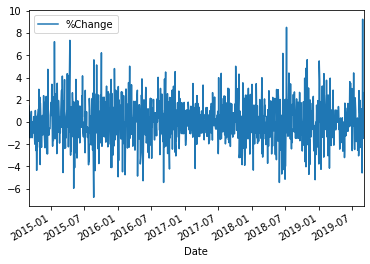

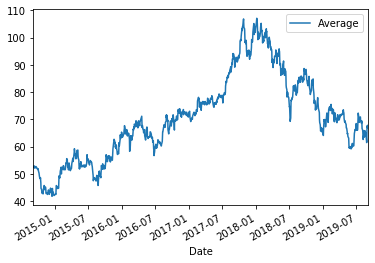

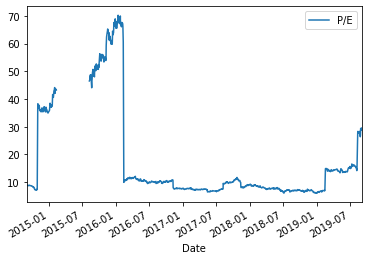

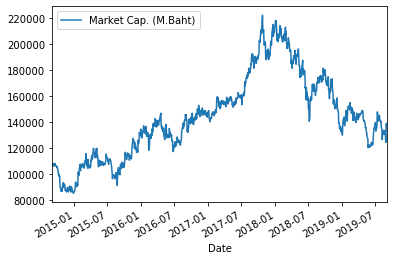

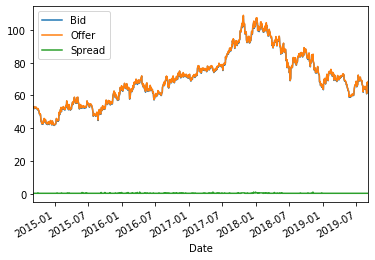

In [19]:
%matplotlib inline

# Construct daily returns dataframe
daily_returns.plot()
daily_averages.plot()
daily_pe.plot()
daily_marketcap.plot()
daily_spreads.plot()

In [20]:
df['%Change'], df['Date']

(0       2.631579
 1      -0.374532
 2      -1.476015
 3      -0.367647
 4       9.236948
           ...   
 1216   -1.421801
 1217   -0.471698
 1218    0.000000
 1219    0.473934
 1220    1.442308
 Name: %Change, Length: 1221, dtype: float64, 0      2019-09-04 00:00:04
 1      2019-09-03 00:00:04
 2      2019-09-02 00:00:04
 3      2019-08-30 00:00:04
 4      2019-08-29 00:00:04
                ...        
 1216   2014-09-11 00:00:04
 1217   2014-09-10 00:00:04
 1218   2014-09-09 00:00:04
 1219   2014-09-08 00:00:04
 1220   2014-09-05 00:00:04
 Name: Date, Length: 1221, dtype: datetime64[ns])

In [21]:
pd.to_datetime(df.Date) # convert to dates from time stamp

0      2019-09-04 00:00:04
1      2019-09-03 00:00:04
2      2019-09-02 00:00:04
3      2019-08-30 00:00:04
4      2019-08-29 00:00:04
               ...        
1216   2014-09-11 00:00:04
1217   2014-09-10 00:00:04
1218   2014-09-09 00:00:04
1219   2014-09-08 00:00:04
1220   2014-09-05 00:00:04
Name: Date, Length: 1221, dtype: datetime64[ns]

In [22]:
# Construct global chronological timeline.

study_period = pd.interval_range(pd.Timestamp('2015-01-01'), pd.Timestamp('2018-12-31'), freq='D')
study_period

IntervalIndex([(2015-01-01, 2015-01-02], (2015-01-02, 2015-01-03], (2015-01-03, 2015-01-04], (2015-01-04, 2015-01-05], (2015-01-05, 2015-01-06] ... (2018-12-26, 2018-12-27], (2018-12-27, 2018-12-28], (2018-12-28, 2018-12-29], (2018-12-29, 2018-12-30], (2018-12-30, 2018-12-31]],
              closed='right',
              dtype='interval[datetime64[ns]]')

In [23]:
study_period[0]  # 1st day of study period

Interval('2015-01-01', '2015-01-02', closed='right')

In [24]:
#mask = (df['Date'] > '2015-1-1') & (df['Date'] <= '2018-12-31')
df = df.loc['2015-01-01':'2018-12-31']
df

Empty DataFrame
Columns: [Date, Prior, Open, High, Low, Close, Change, %Change, Average, Bid, Offer, AOM Volume (k.Shares), AOM Value (M.Baht), TR Volume (k.Shares), TR Value (M.Baht), Total Volume (k.Shares), Total Value (M.Baht), P/E, PEG, P/BV, BVPS (Baht), %Dividend Yield, %12M Dividend Yield, Market Cap. (M.Baht), %Volume Turnover, Par (Baht), Listed Shares, Trading Sign, Benefit Sign]
Index: []

[0 rows x 29 columns]

In [25]:
# Get data between two dates
# https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates

# Try to use .loc to extract data for only during study period.

daily_returns.index[1].date()

datetime.date(2019, 9, 3)

In [26]:
df

Empty DataFrame
Columns: [Date, Prior, Open, High, Low, Close, Change, %Change, Average, Bid, Offer, AOM Volume (k.Shares), AOM Value (M.Baht), TR Volume (k.Shares), TR Value (M.Baht), Total Volume (k.Shares), Total Value (M.Baht), P/E, PEG, P/BV, BVPS (Baht), %Dividend Yield, %12M Dividend Yield, Market Cap. (M.Baht), %Volume Turnover, Par (Baht), Listed Shares, Trading Sign, Benefit Sign]
Index: []

[0 rows x 29 columns]

In [27]:
ht_dataset[0].symbol

'TOP'

In [28]:
ht_dataset[1].symbol

'THANI'

In [29]:
stock1 = ht_dataset[1]
stock1.dataframe()

Date     Prior      Open      High       Low     Close  \
0    2019-09-04 00:00:04  7.200000  7.200000  7.300000  7.150000  7.150000   
1    2019-09-03 00:00:04  7.150000  7.200000  7.250000  7.100000  7.200000   
2    2019-09-02 00:00:04  7.100000  7.150000  7.300000  7.050000  7.150000   
3    2019-08-30 00:00:04  7.150000  7.200000  7.250000  7.100000  7.100000   
4    2019-08-29 00:00:04  7.000000  7.050000  7.200000  6.950000  7.150000   
...                  ...       ...       ...       ...       ...       ...   
1216 2014-09-11 00:00:04  2.026586  2.026586  2.058584  2.015919  2.047918   
1217 2014-09-10 00:00:04  2.026586  2.037252  2.037252  2.015919  2.026586   
1218 2014-09-09 00:00:04  2.026586  2.026586  2.047918  2.026586  2.026586   
1219 2014-09-08 00:00:04  2.037252  2.037252  2.058584  2.026586  2.026586   
1220 2014-09-05 00:00:04  2.037252  2.037252  2.047918  2.026586  2.037252   

        Change   %Change   Average       Bid  ...  P/BV  \
0    -0.050000 -0.694444  7.201987  7.150000  ...  3.68   
1     0.050000  0.699301  7.174568  7.150000  ...  3.71   
2     0.050000  0.704225  7.182212  7.150000  ...  3.68   
3    -0.050000 -0.699301  7.162878  7.100000  ...  3.66   
4     0.150000  2.142857  7.112923  7.150000  ...  3.68   
...        ...       ...       ...       ...  ...   ...   
1216  0.021332  1.052632  2.040851  2.037252  ...  2.18   
1217  0.000000  0.000000  2.023659  2.015919  ...  2.16   
1218  0.000000  0.000000  2.036944  2.026586  ...  2.16   
1219 -0.010666 -0.523560  2.044603  2.026586  ...  2.16   
1220  0.000000  0.000000  2.036448  2.037252  ...  2.17   

                    BVPS (Baht)            %Dividend Yield  \
0                   number:1.94   number:3.240000009536743   
1                   number:1.94  number:3.2200000286102295   
2                   number:1.94   number:3.240000009536743   
3                   number:1.94  number:3.2699999809265137   
4                   number:1.94   number:3.240000009536743   
...                         ...                        ...   
1216  number:0.9386291200000002  number:0.6299999952316284   
1217  number:0.9386291200000002  number:0.6299999952316284   
1218  number:0.9386291200000002  number:0.6299999952316284   
1219  number:0.9386291200000002  number:0.6299999952316284   
1220  number:0.9386291200000002  number:0.6299999952316284   

     %12M Dividend Yield Market Cap. (M.Baht)  %Volume Turnover  Par (Baht)  \
0            number:3.24         26993.777168              0.39  number:1.0   
1            number:3.22         27182.544840              0.29  number:1.0   
2            number:3.24         26993.777168              0.64  number:1.0   
3            number:3.27         26805.009495              0.41  number:1.0   
4            number:3.24         26993.777168              0.55  number:1.0   
...                  ...                  ...               ...         ...   
1216            text:'-'          7731.927468              0.06  number:1.0   
1217            text:'-'          7651.386556              0.11  number:1.0   
1218            text:'-'          7651.386556              0.11  number:1.0   
1219            text:'-'          7651.386556              0.15  number:1.0   
1220            text:'-'          7691.657012              0.09  number:1.0   

      Listed Shares Trading Sign  Benefit Sign  
0      3.775353e+09     text:'-'      text:'-'  
1      3.775353e+09     text:'-'      text:'-'  
2      3.775353e+09     text:'-'      text:'-'  
3      3.775353e+09     text:'-'      text:'-'  
4      3.775353e+09     text:'-'      text:'-'  
...             ...          ...           ...  
1216   2.013523e+09     text:'-'      text:'-'  
1217   2.013523e+09     text:'-'      text:'-'  
1218   2.013523e+09     text:'-'      text:'-'  
1219   2.013523e+09     text:'-'      text:'-'  
1220   2.013523e+09     text:'-'      text:'-'  

[1221 rows x 29 columns]

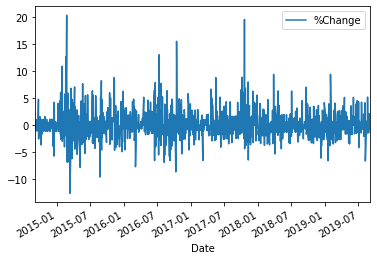

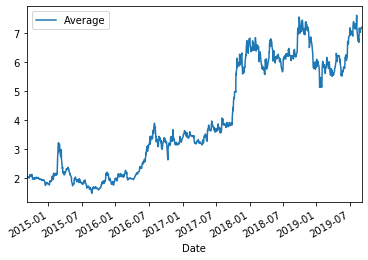

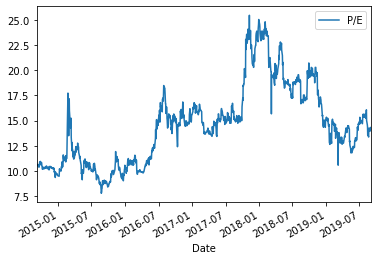

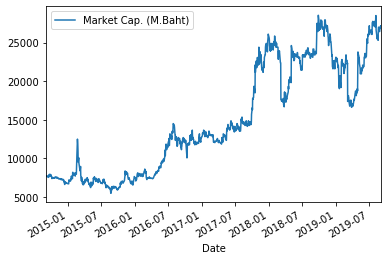

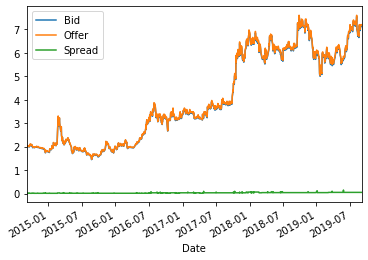

In [30]:

ts = stock1.timeseries()

daily_returns = ts['daily_returns']
daily_averages = ts['daily_averages']
daily_pe = ts['daily_pe']
daily_marketcap = ts['daily_marketcap']
daily_spreads = ts['daily_spreads']

# Construct daily returns dataframe
daily_returns.plot()
daily_averages.plot()
daily_pe.plot()
daily_marketcap.plot()
daily_spreads.plot()

# Test for all Stocks in Data Folder

In [31]:
!ls

AAV	BCP	KBANK  MAJOR  OSP    PTT     RS     SPALI  TCAP   TOA	 TVO
AEONTS	BCPG	KCE    MBK    PLANB  PTTEP   SAWAD  SPRC   THAI   TOP	 WHA
AMATA	BDMS	KKP    MEGA   PRM    PTTGC   SCB    STA    THANI  TPIPP
ANAN	BEAUTY	KTB    MINT   PSH    QH      SCC    STEC   TISCO  TRUE
AP	JAS	KTC    MTC    PSL    RATCH   SGP    SUPER  TKN	  TTW
BCH	JMT	LH     ORI    PTG    ROBINS  SIRI   TASCO  TMB	  TU


TOP
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't 

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


TTW
OSP
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Ca

ORI
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't 

TVO
Can't convert to float: text:'-'
KTC
JAS
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
KTB
PSL
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float:

QH
ANAN
ANAN :: [Errno 2] No such file or directory: 'ANAN/HistoricalTrading.xlsx'
TISCO
RS
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to 

BEAUTY
BEAUTY :: [Errno 2] No such file or directory: 'BEAUTY/HistoricalTrading.xlsx'
TOA
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to fl

ROBINS
RATCH
SUPER
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: 

WHA
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
PTG
MEGA
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
BCP
BCP :: [Errno 2] No such file or directory: 'BCP/Historical

SIRI
TPIPP
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'

MTC
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't 

TMB
KCE
BCPG
BCPG :: [Errno 2] No such file or directory: 'BCPG/HistoricalTrading.xlsx'
TU
AMATA
AMATA :: [Errno 2] No such file or directory: 'AMATA/HistoricalTrading.xlsx'
STA
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'-'
Can't convert to float: text:'

TASCO


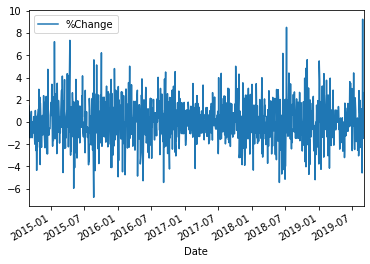

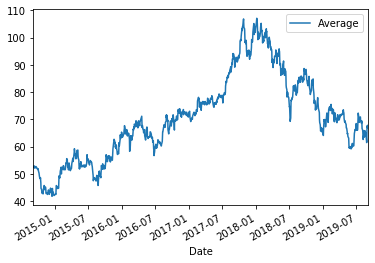

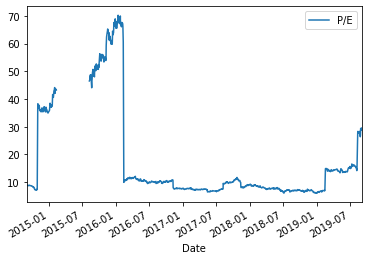

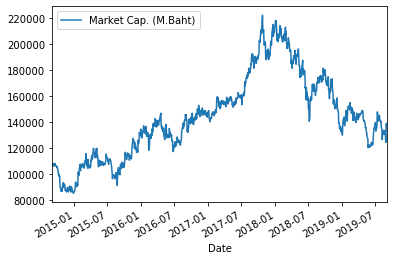

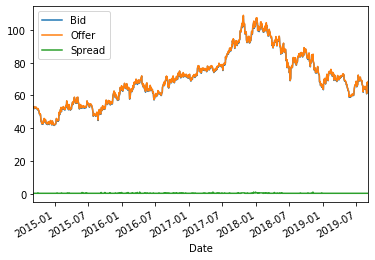

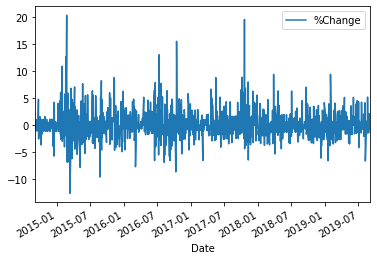

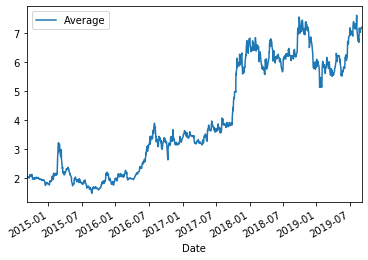

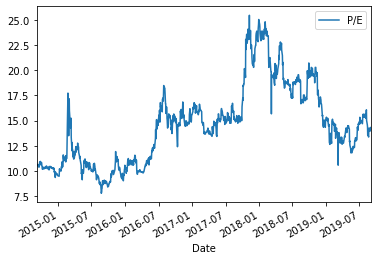

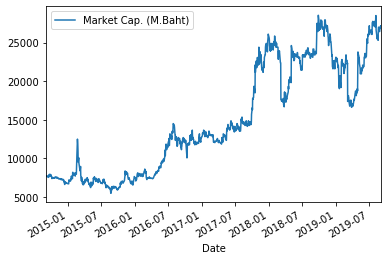

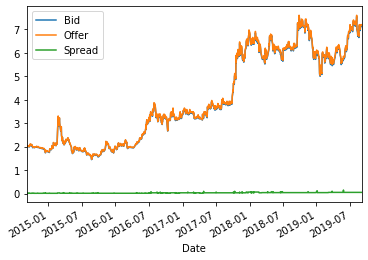

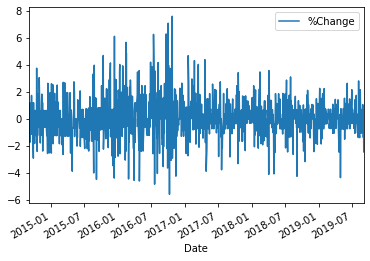

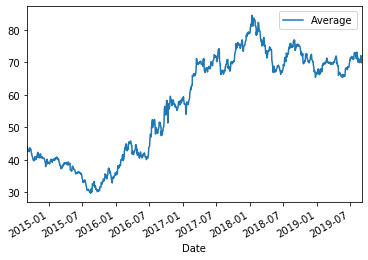

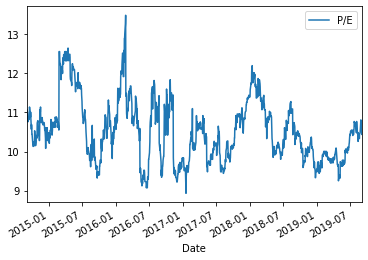

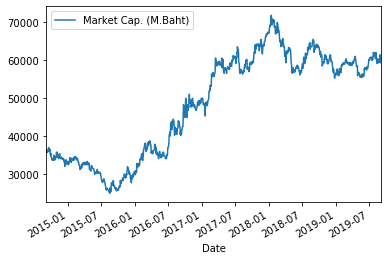

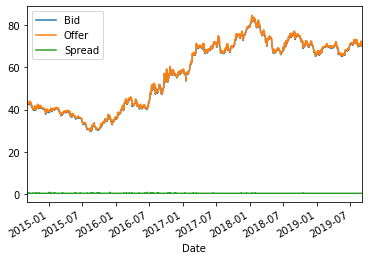

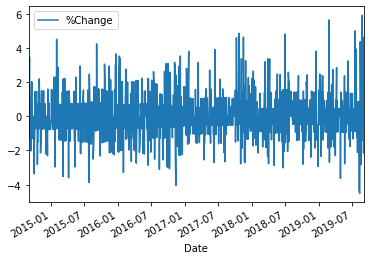

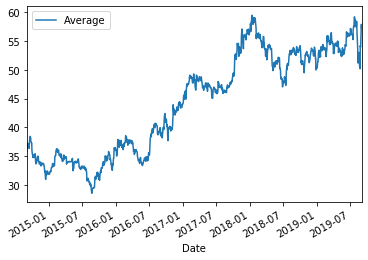

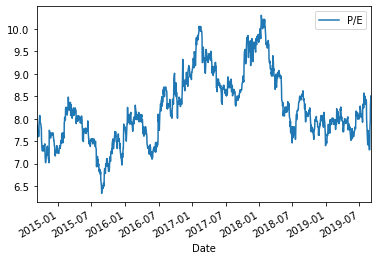

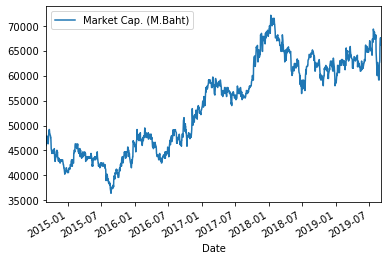

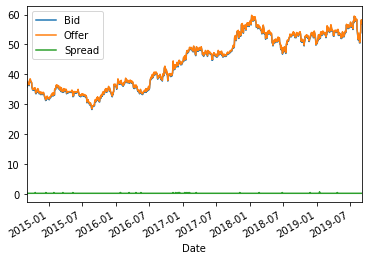

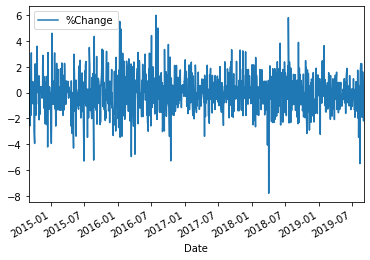

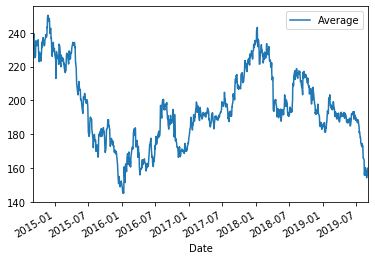

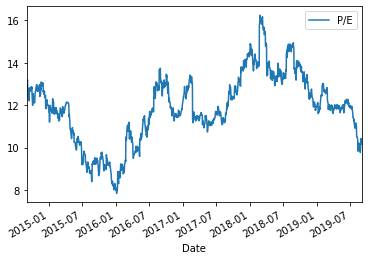

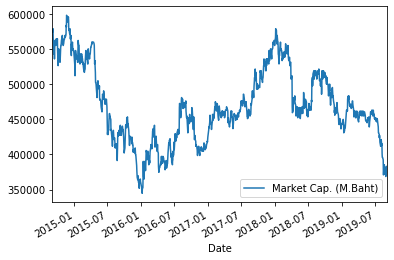

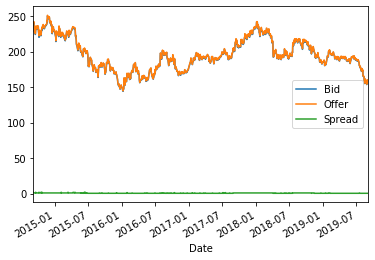

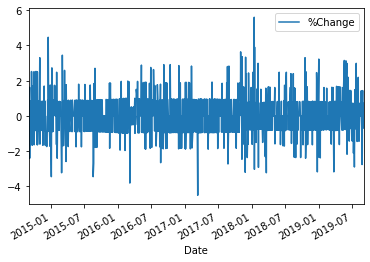

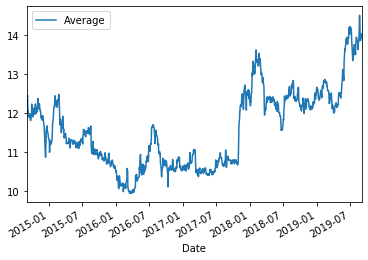

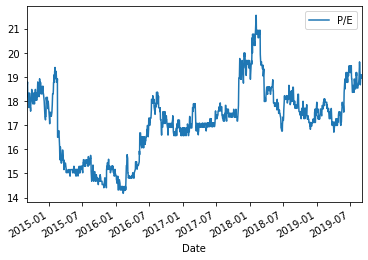

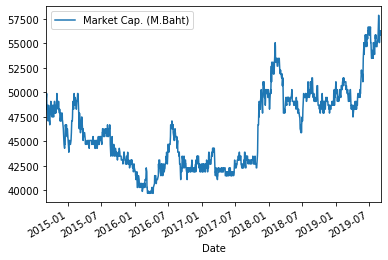

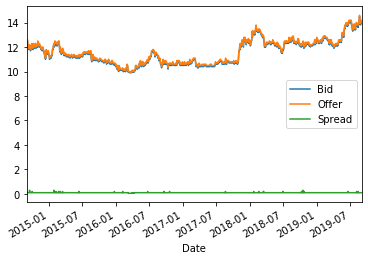

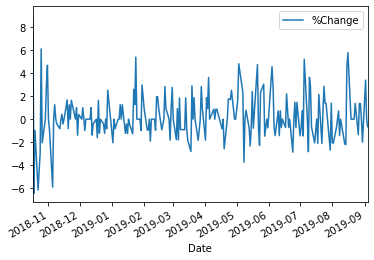

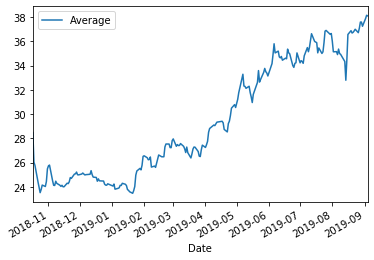

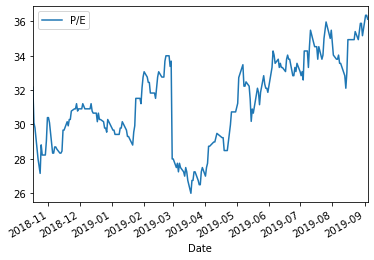

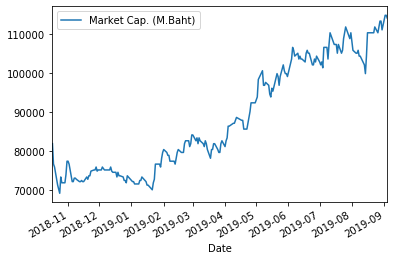

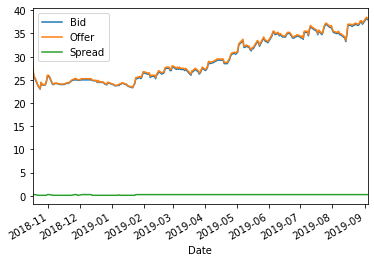

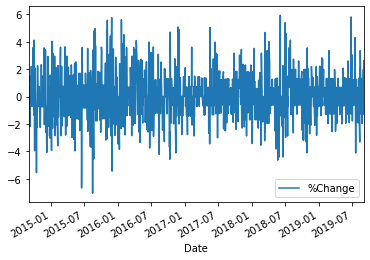

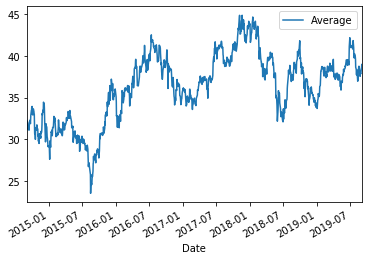

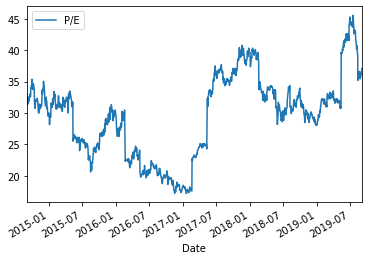

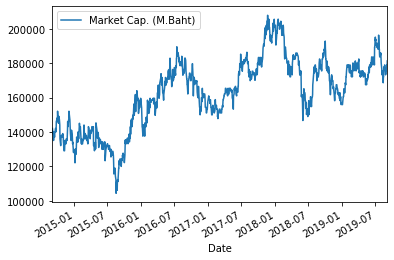

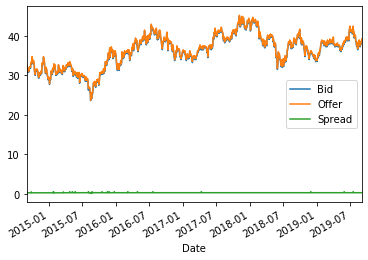

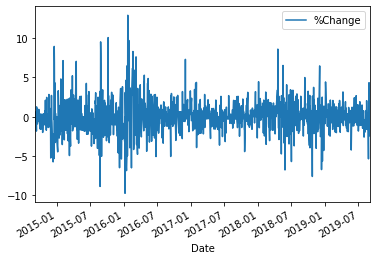

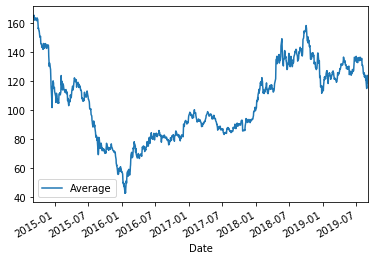

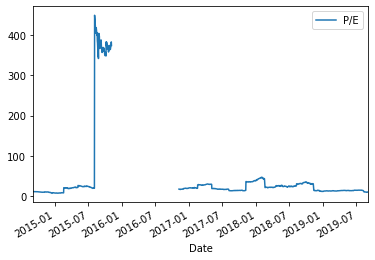

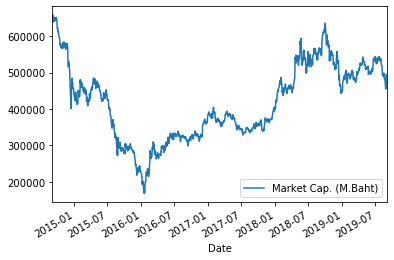

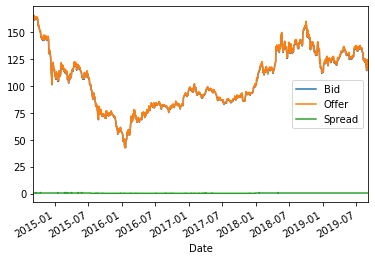

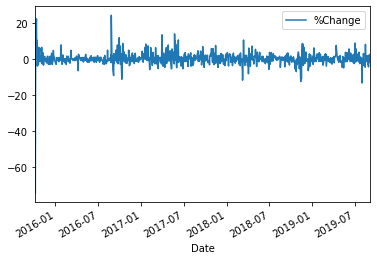

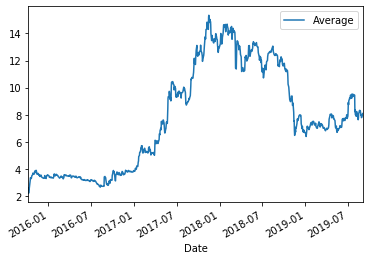

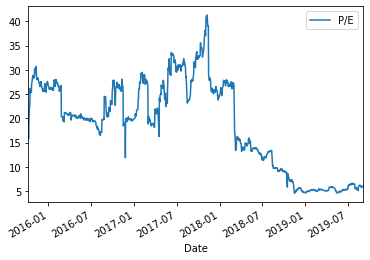

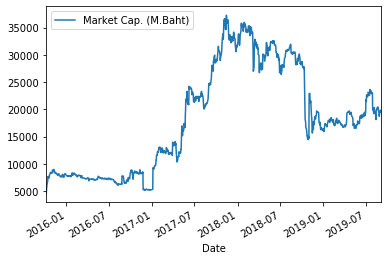

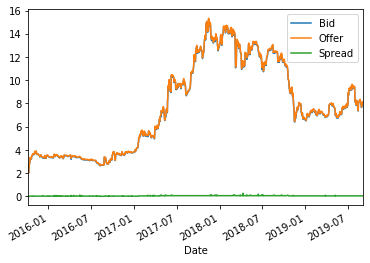

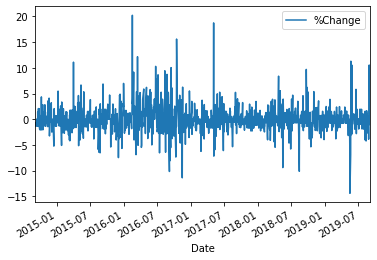

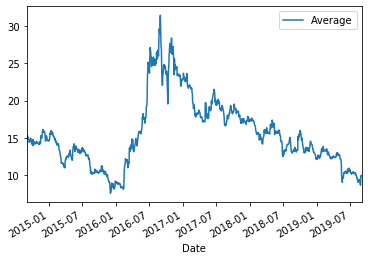

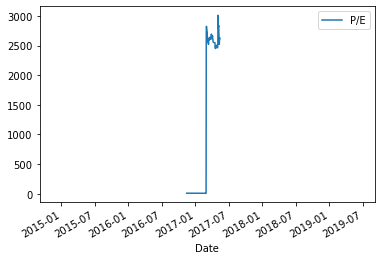

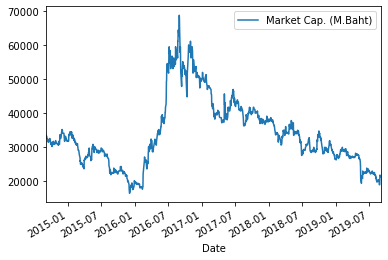

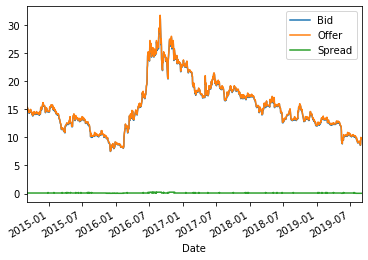

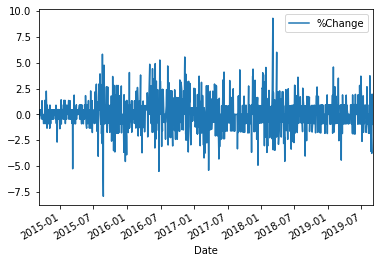

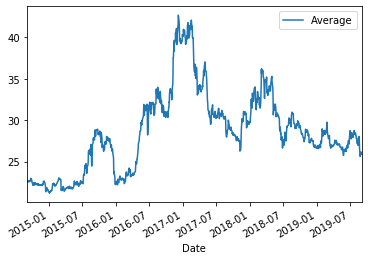

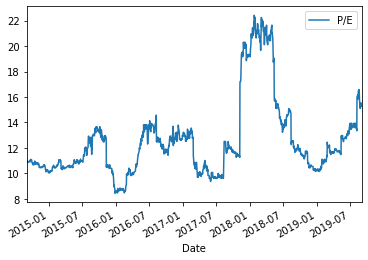

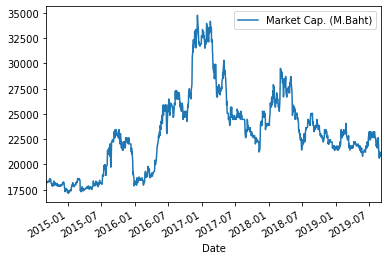

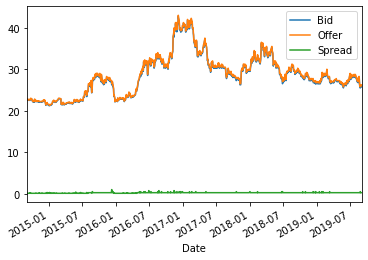

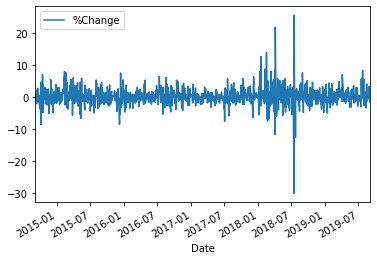

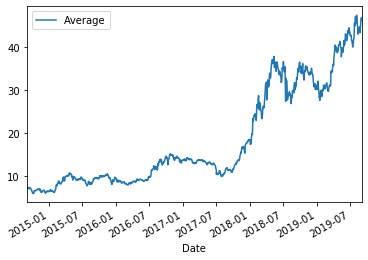

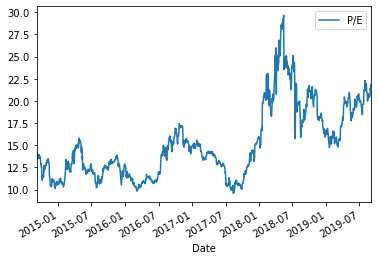

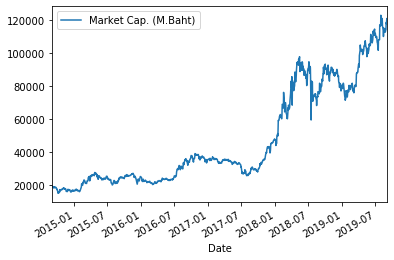

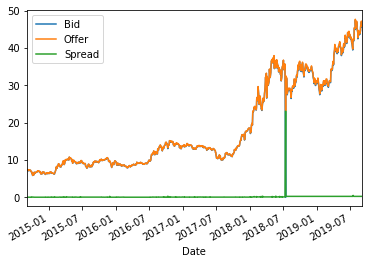

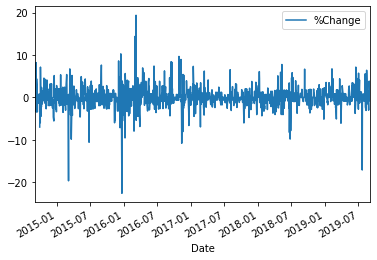

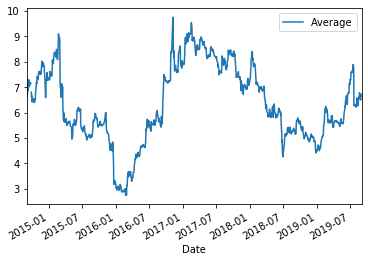

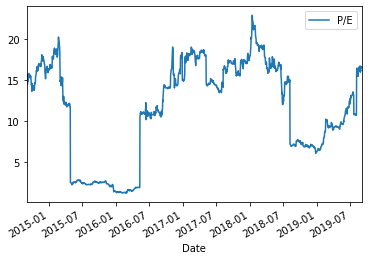

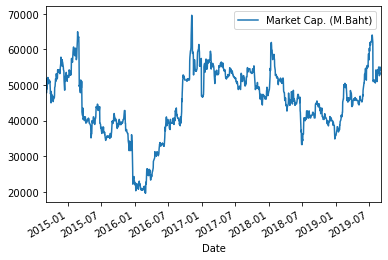

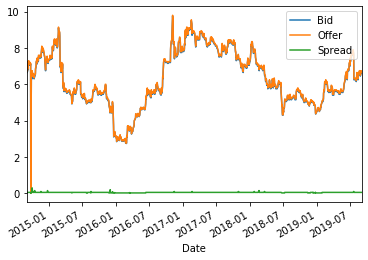

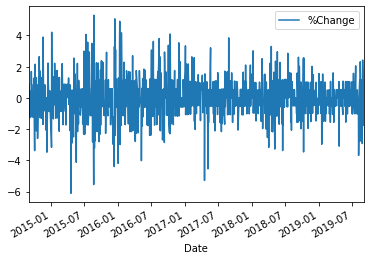

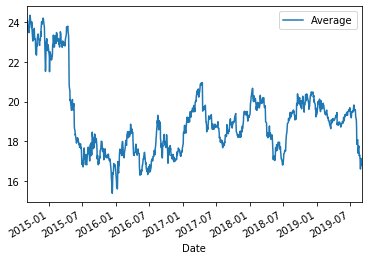

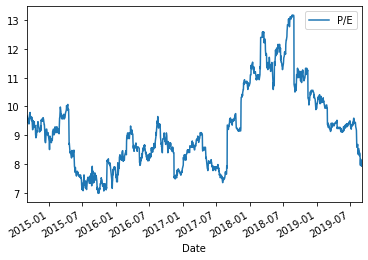

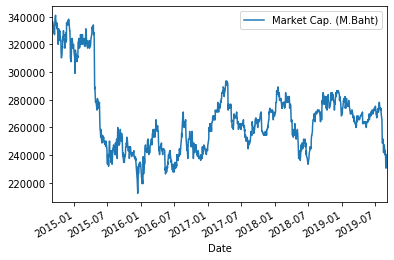

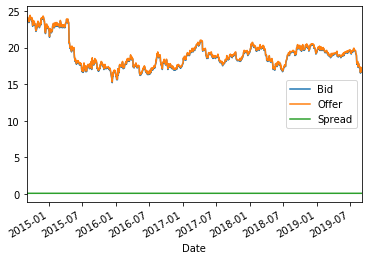

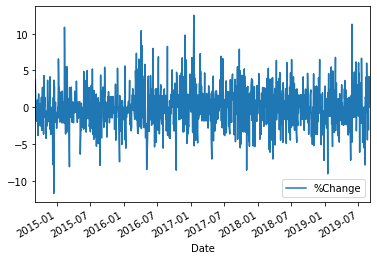

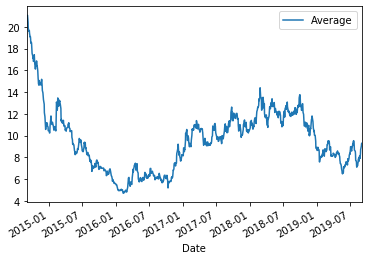

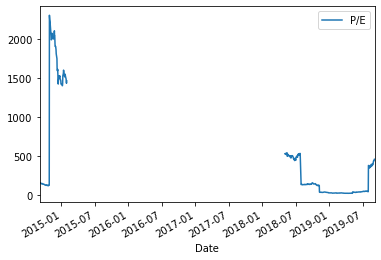

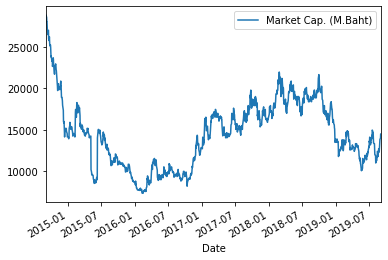

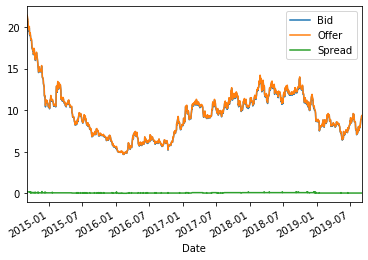

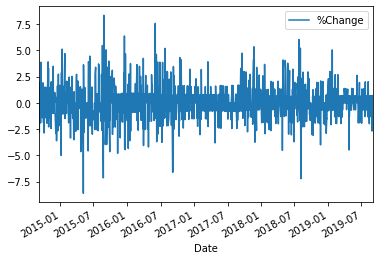

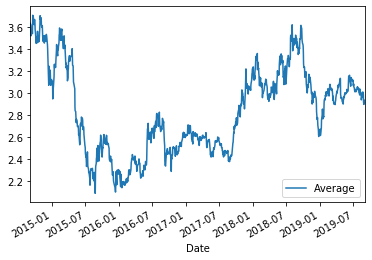

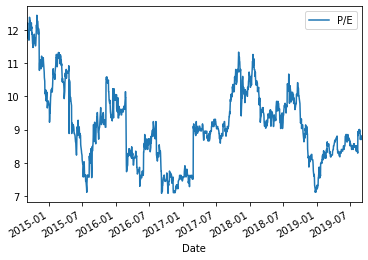

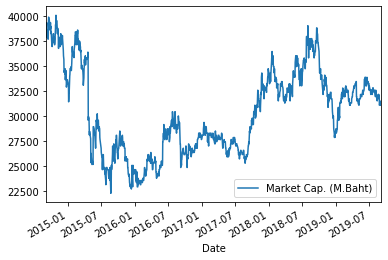

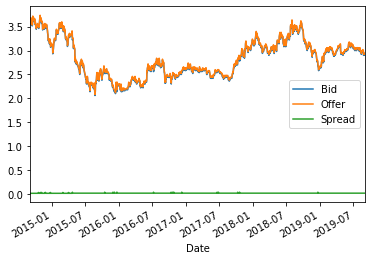

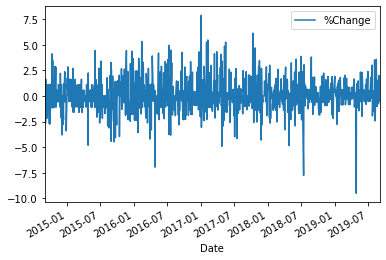

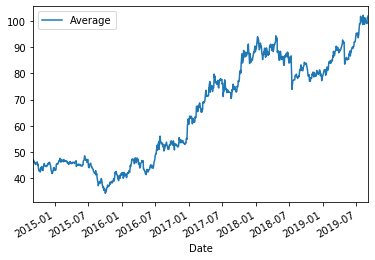

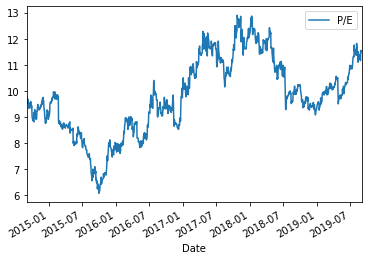

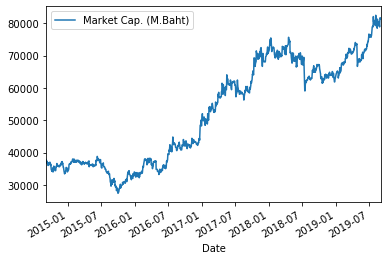

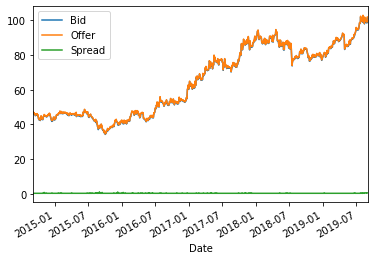

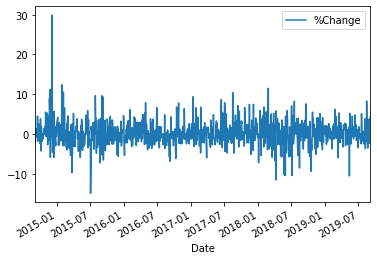

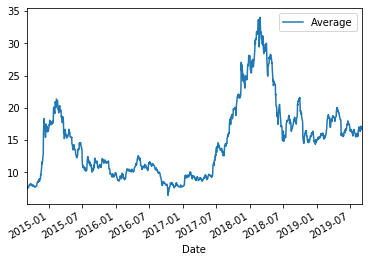

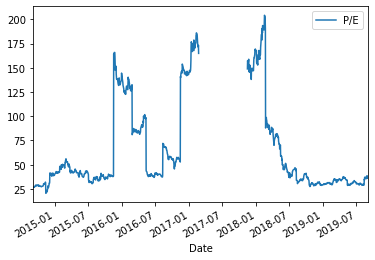

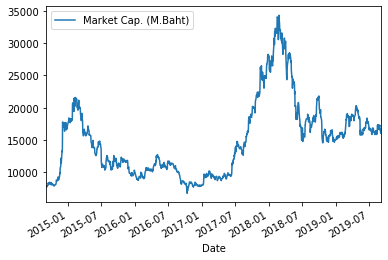

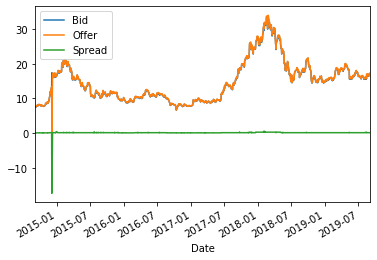

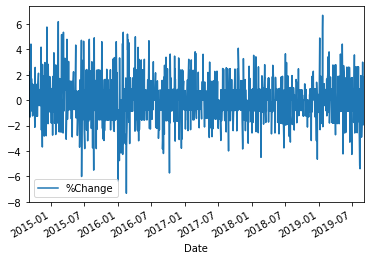

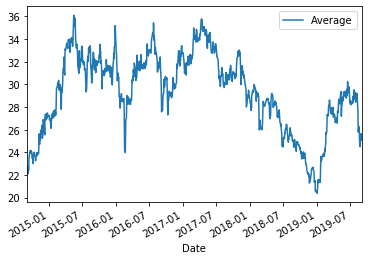

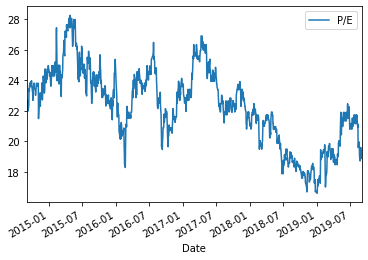

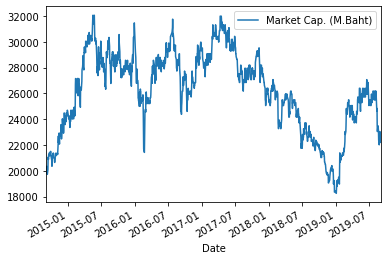

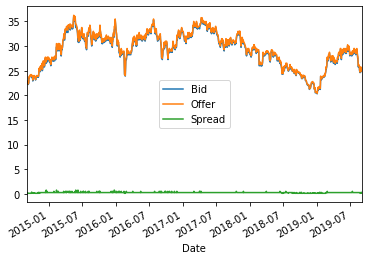

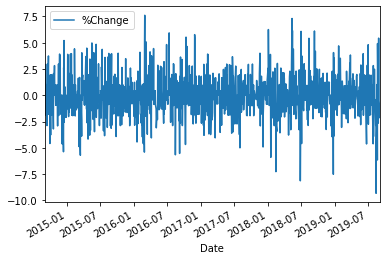

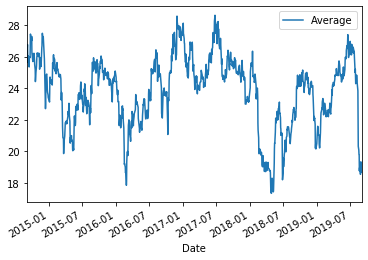

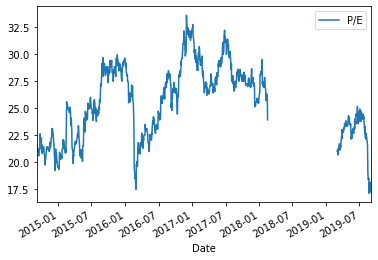

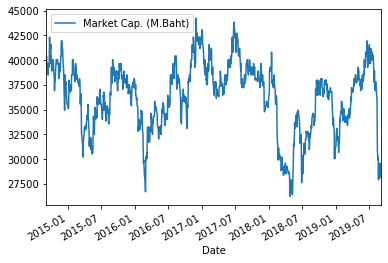

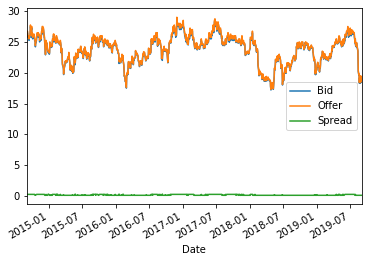

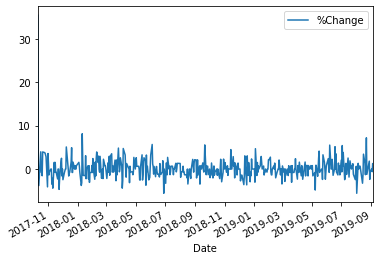

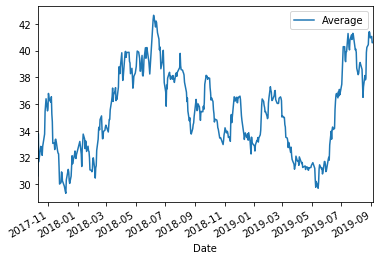

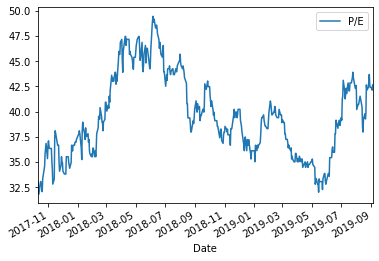

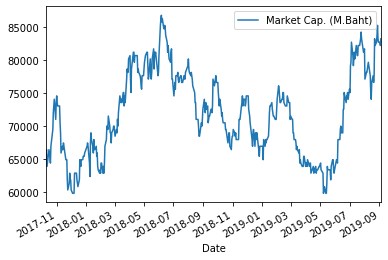

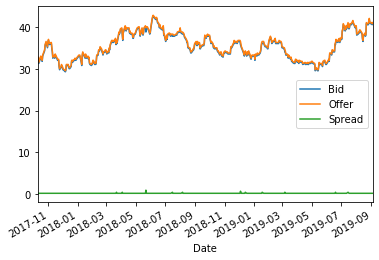

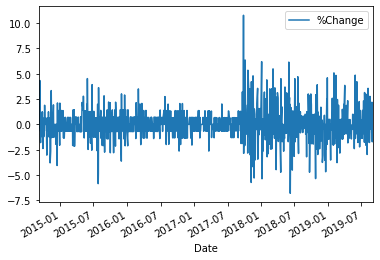

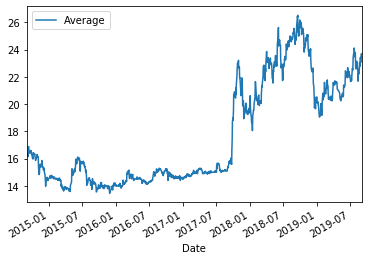

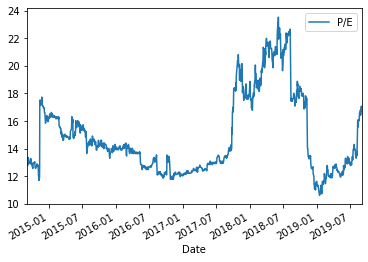

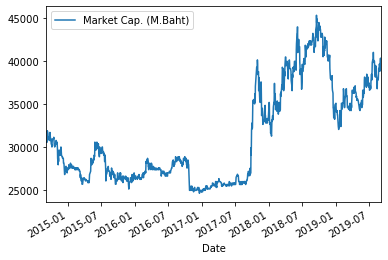

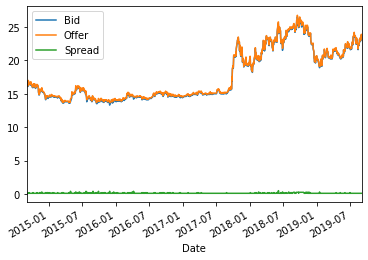

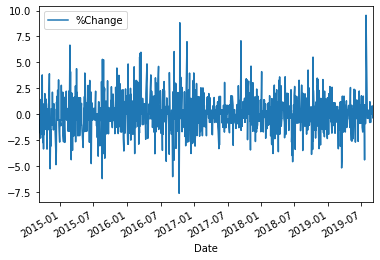

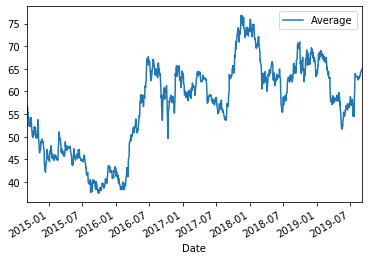

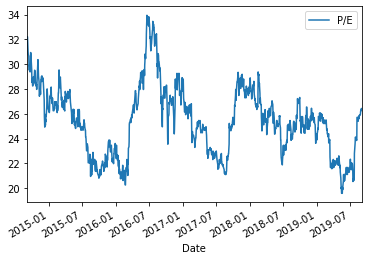

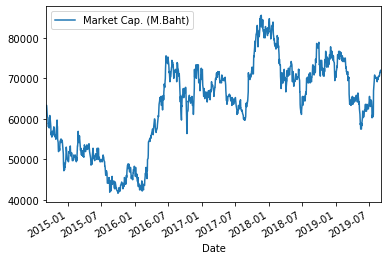

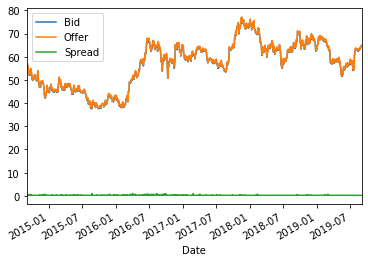

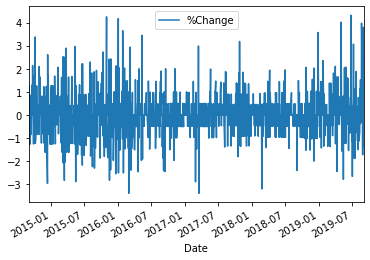

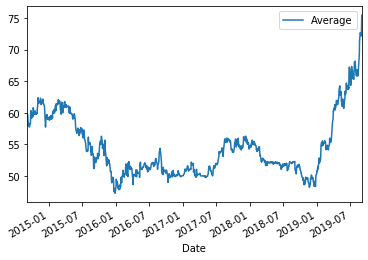

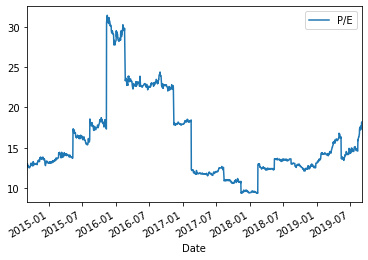

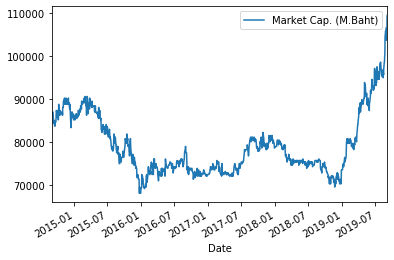

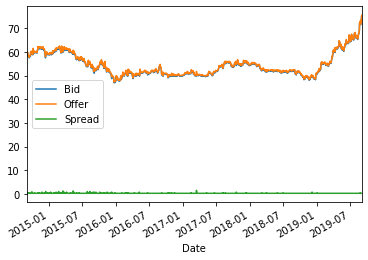

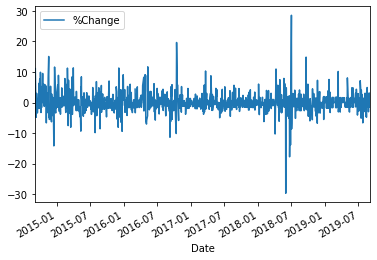

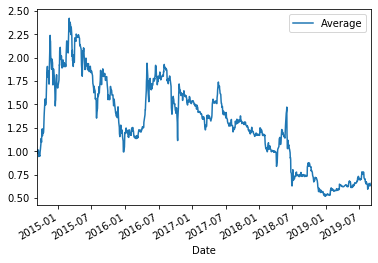

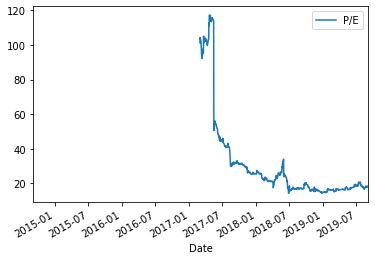

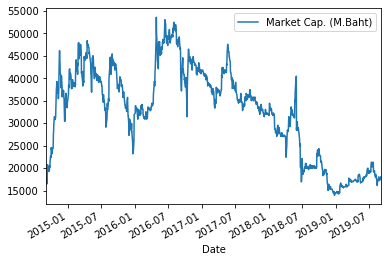

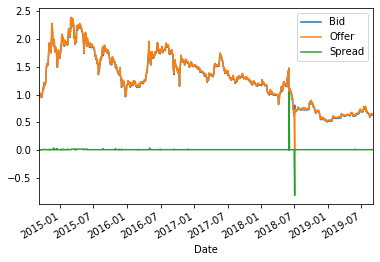

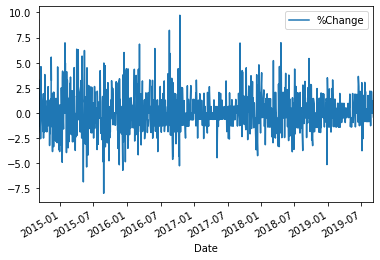

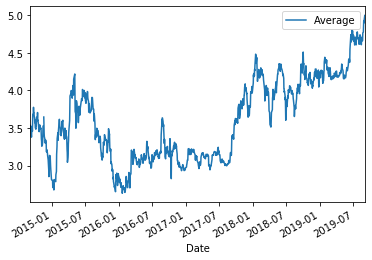

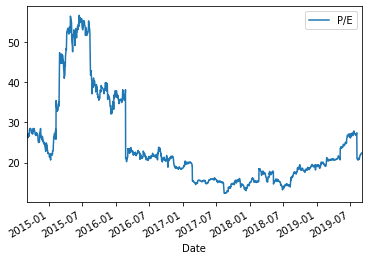

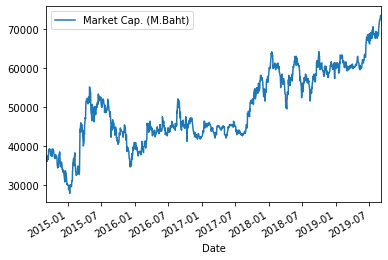

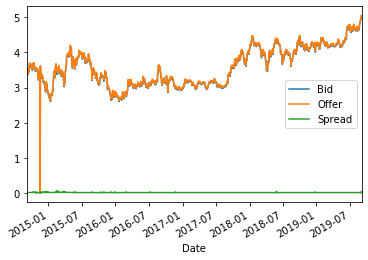

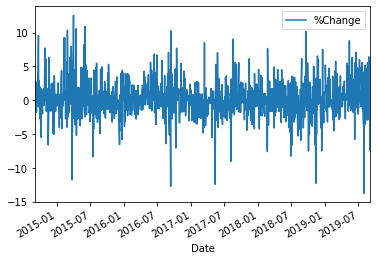

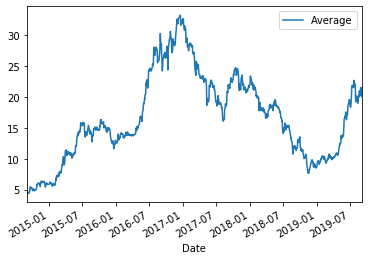

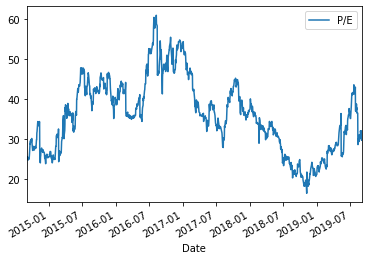

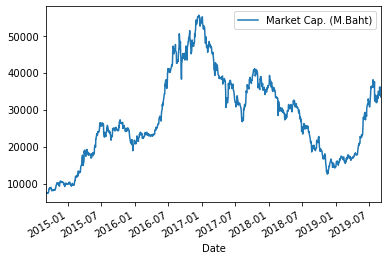

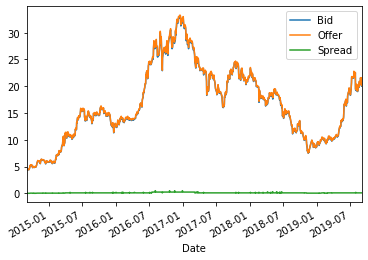

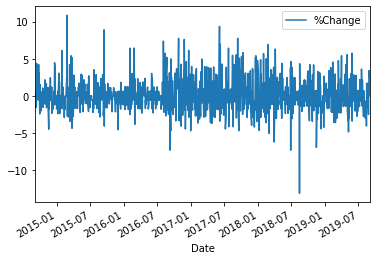

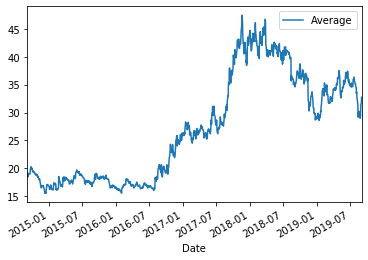

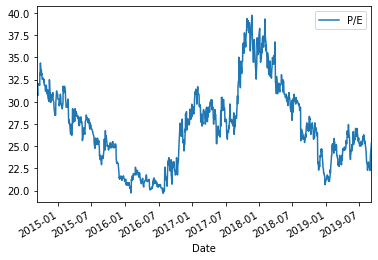

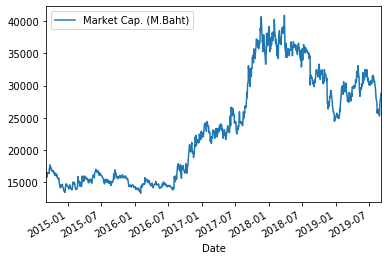

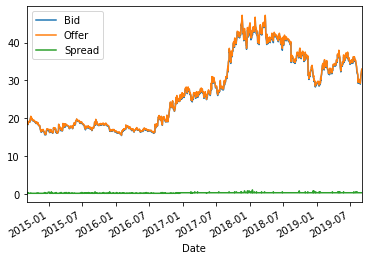

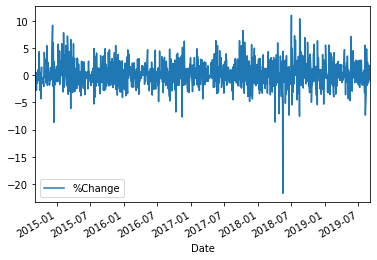

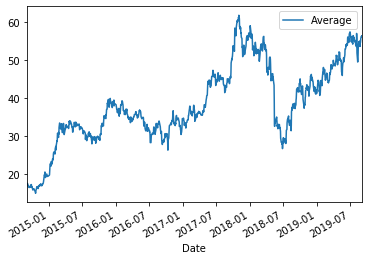

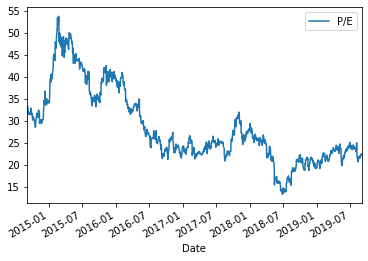

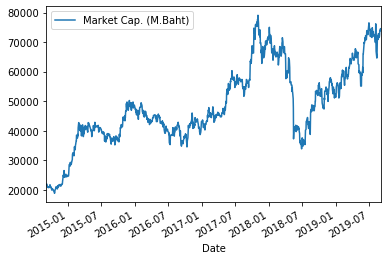

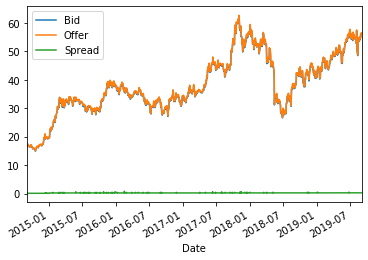

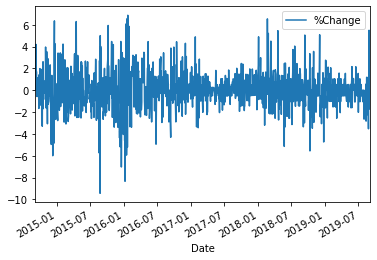

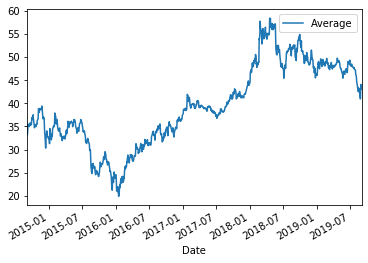

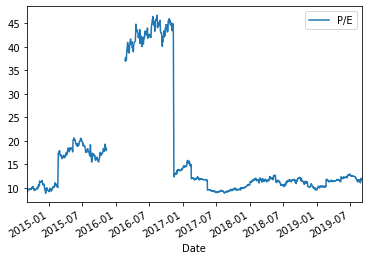

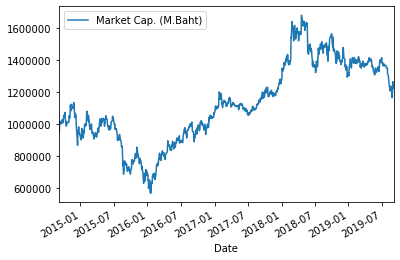

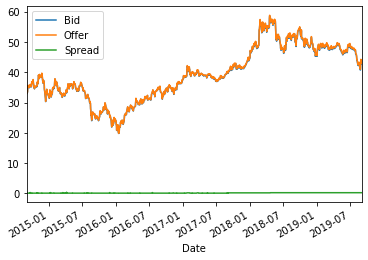

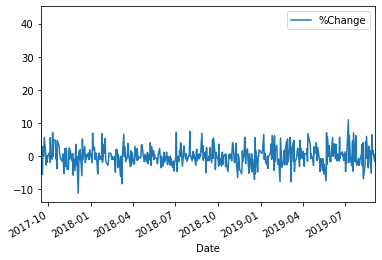

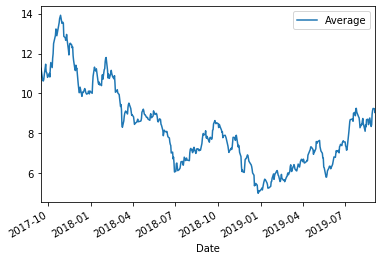

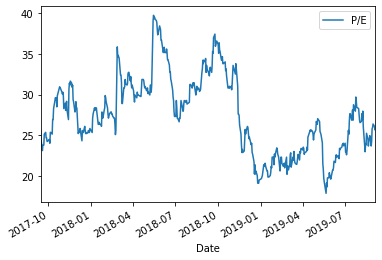

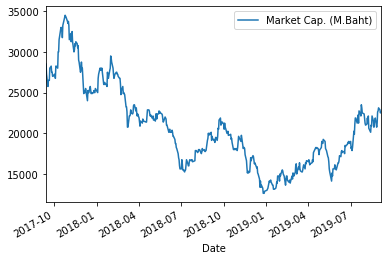

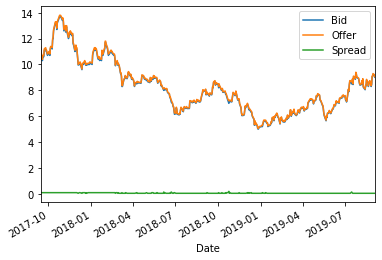

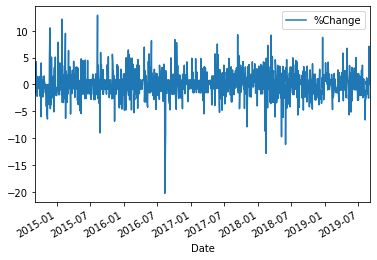

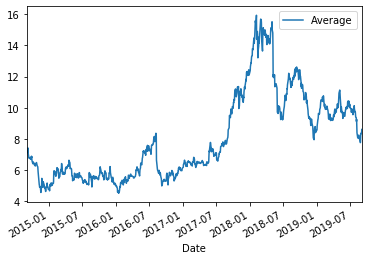

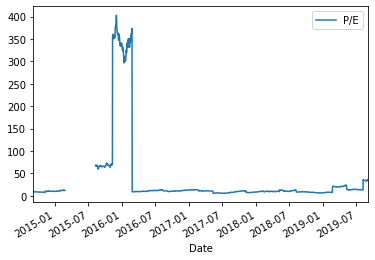

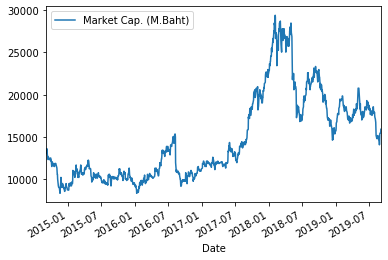

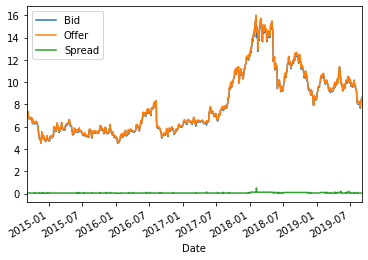

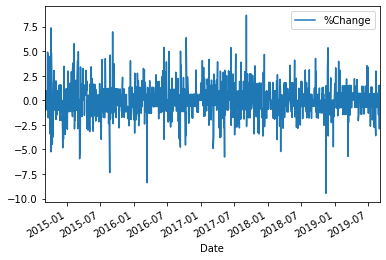

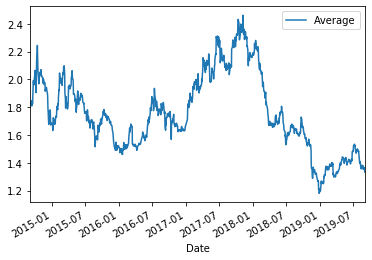

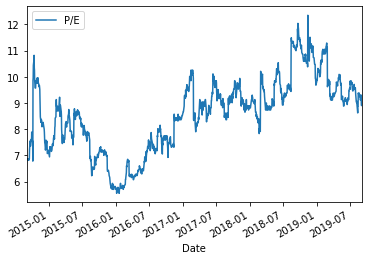

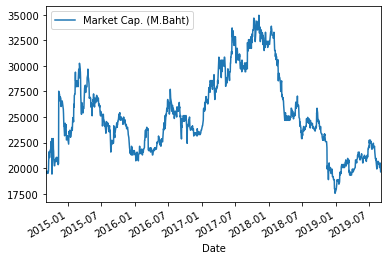

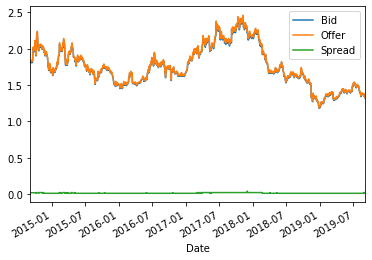

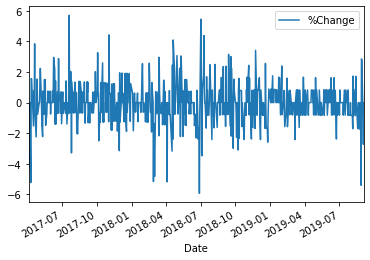

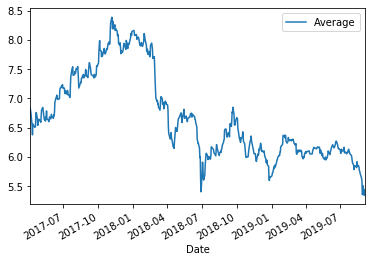

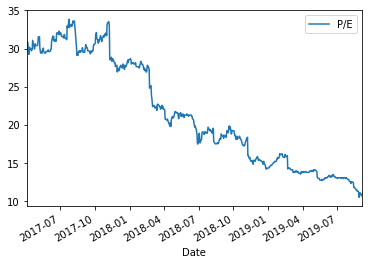

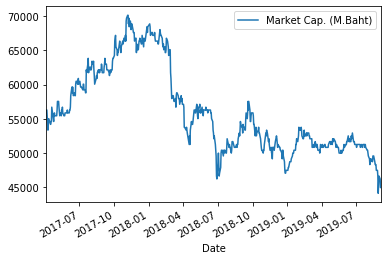

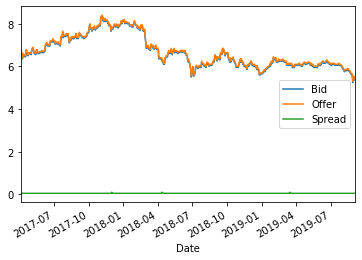

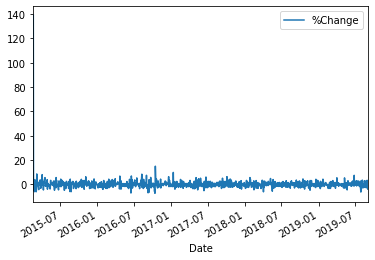

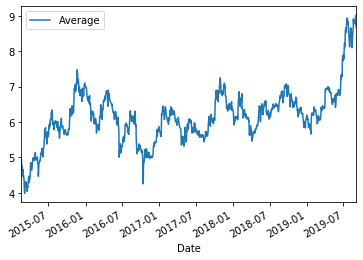

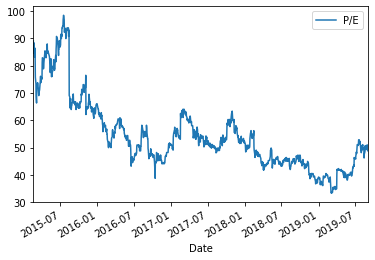

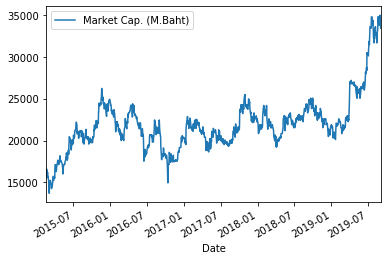

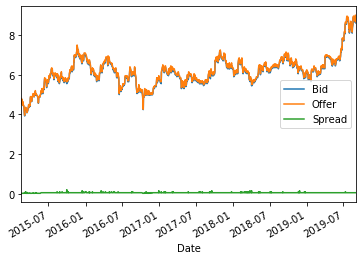

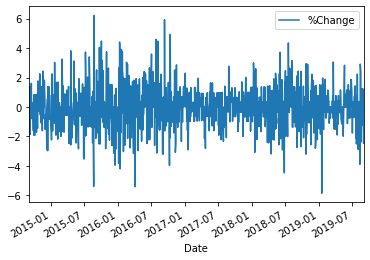

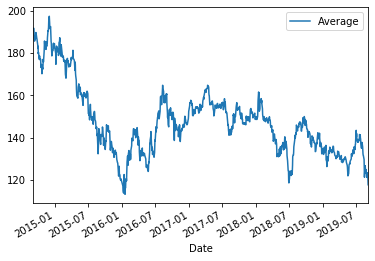

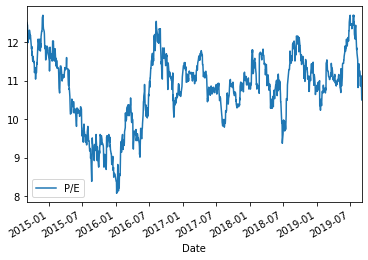

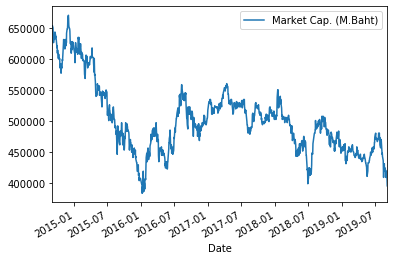

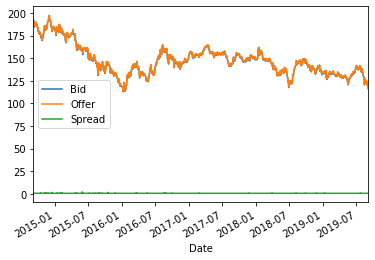

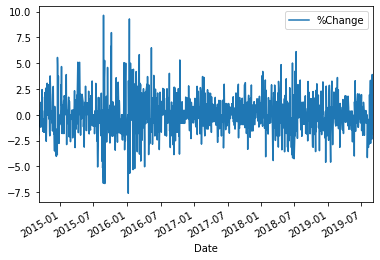

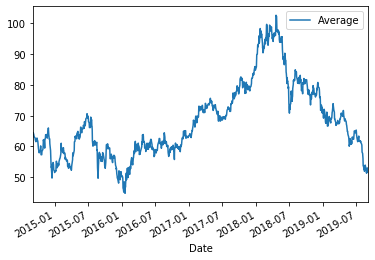

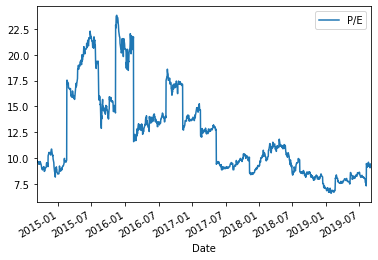

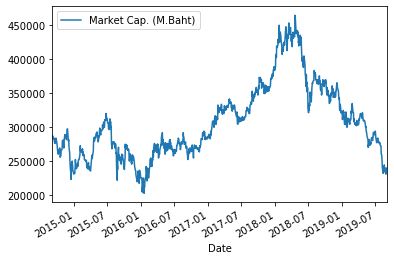

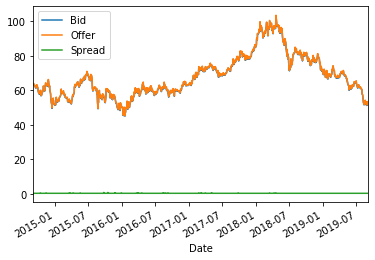

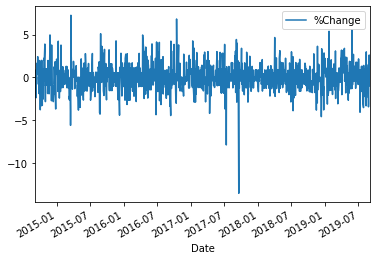

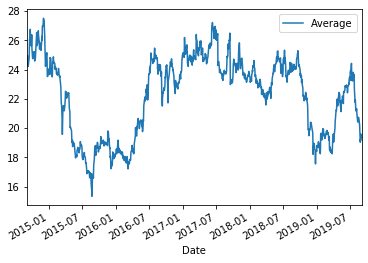

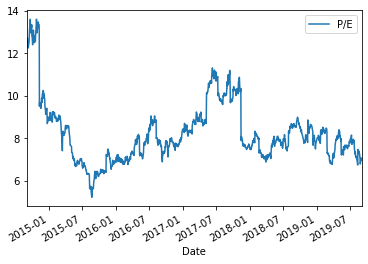

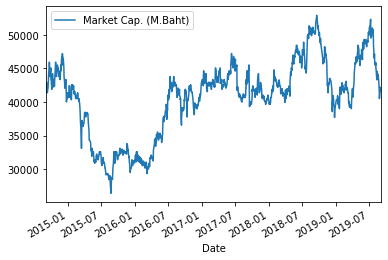

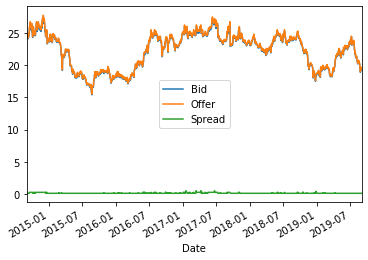

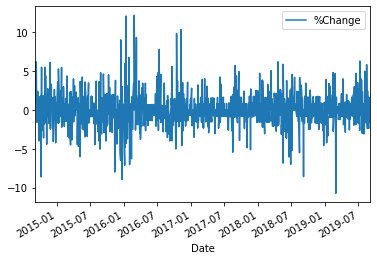

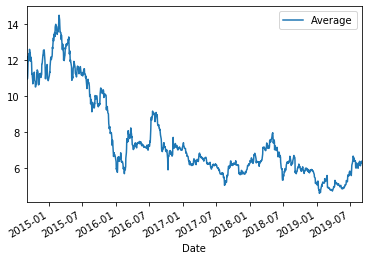

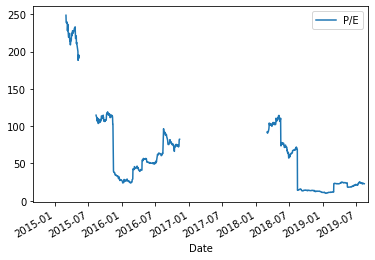

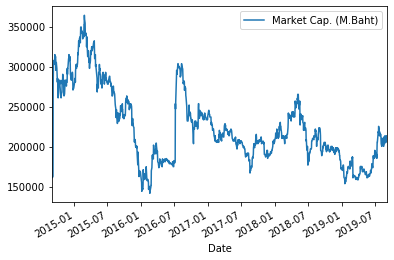

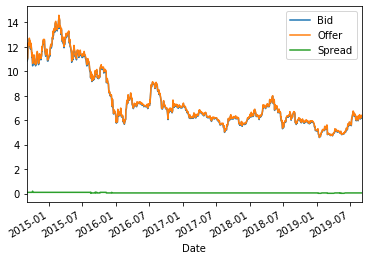

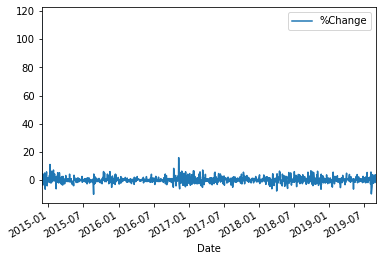

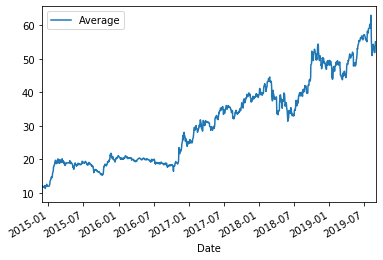

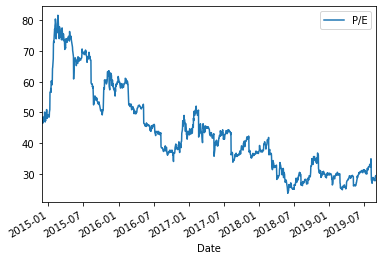

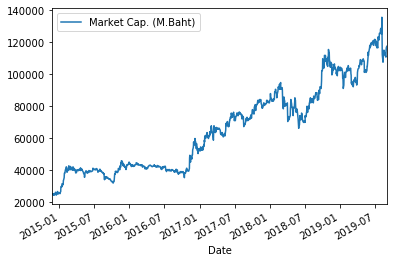

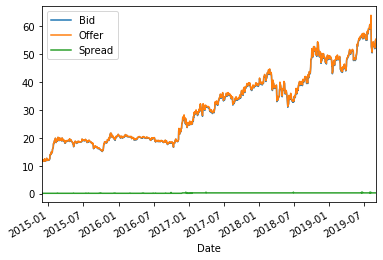

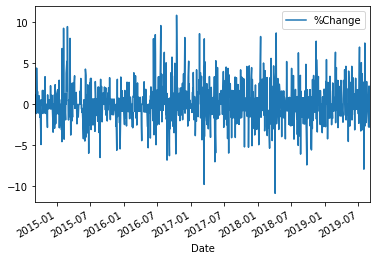

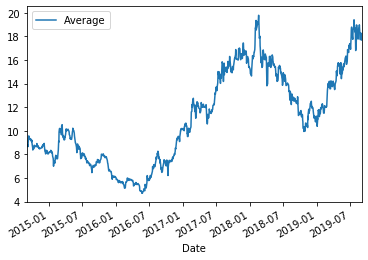

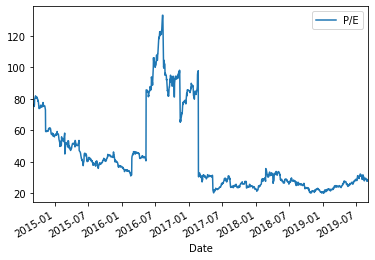

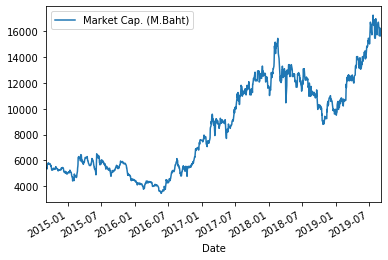

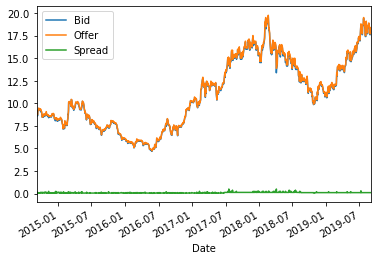

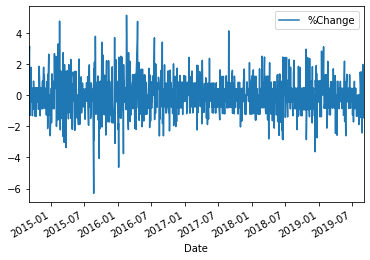

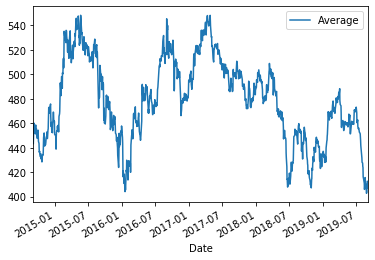

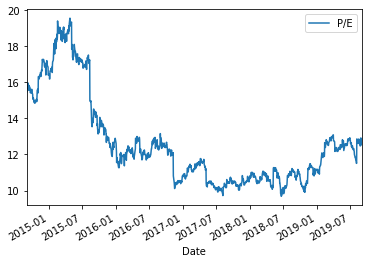

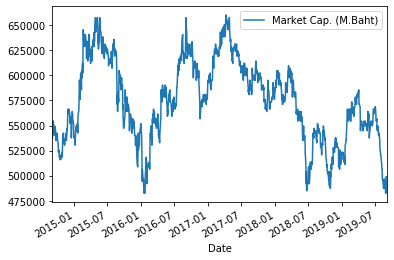

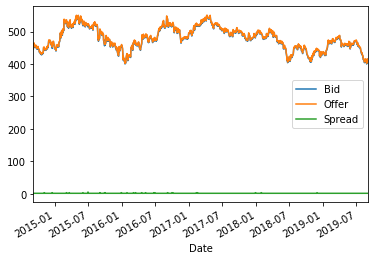

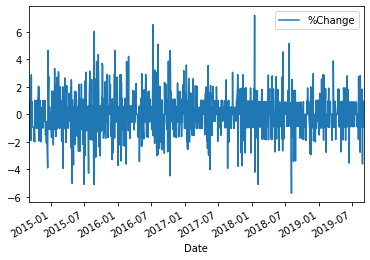

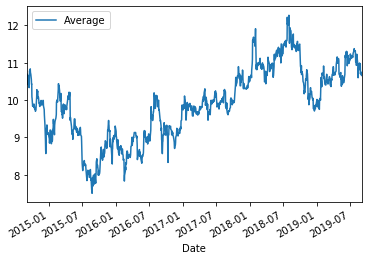

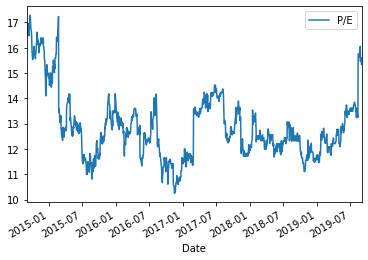

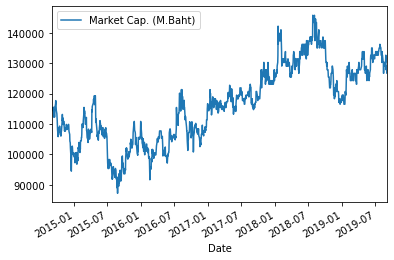

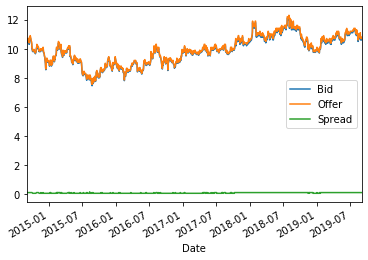

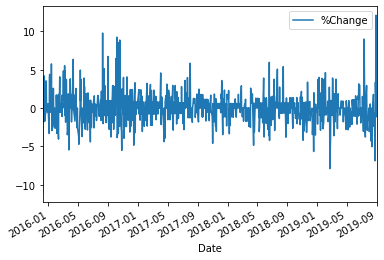

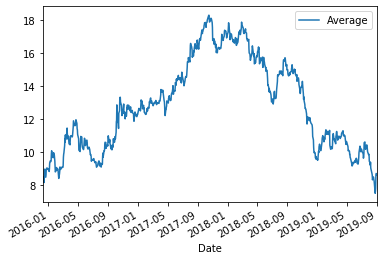

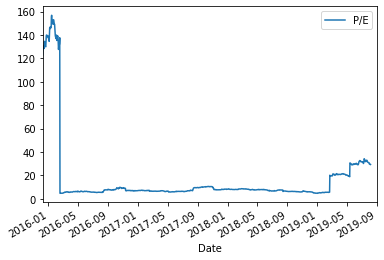

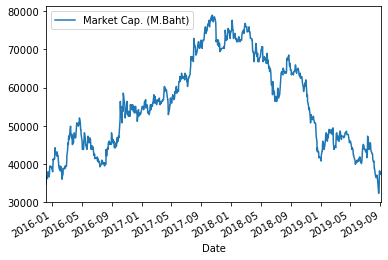

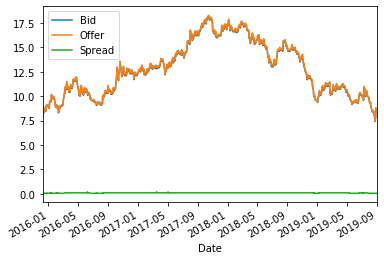

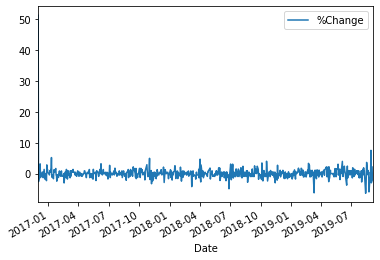

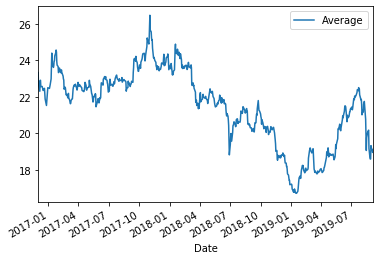

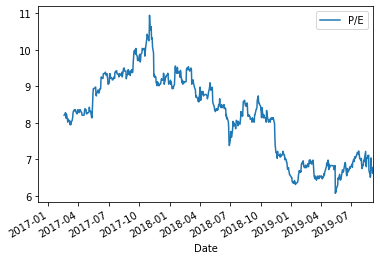

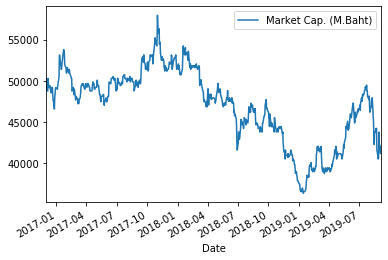

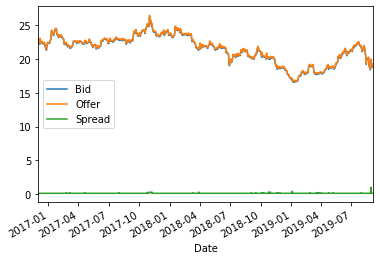

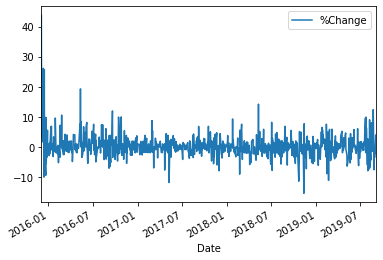

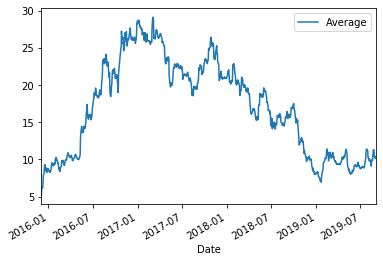

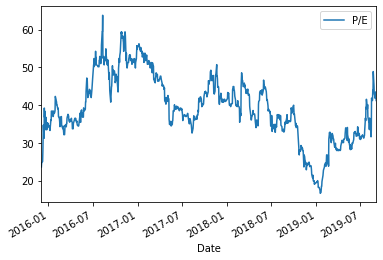

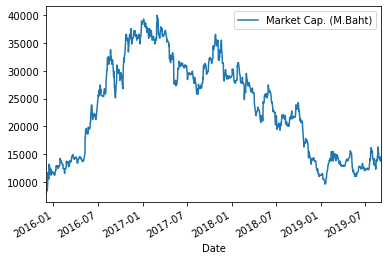

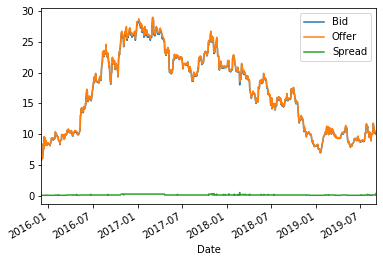

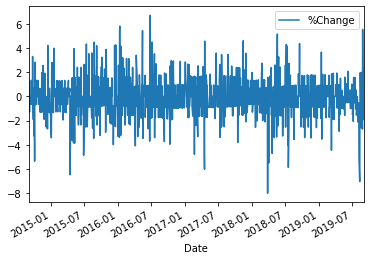

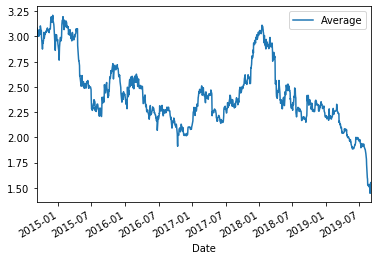

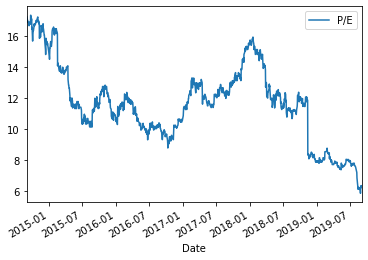

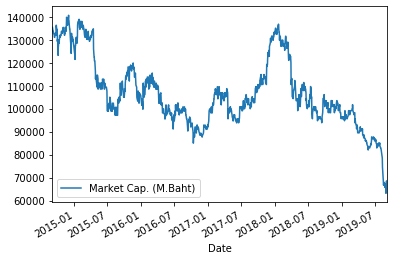

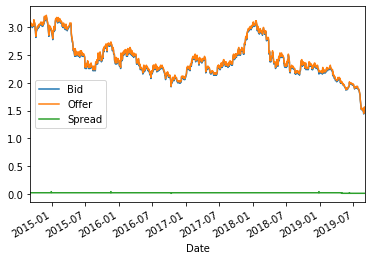

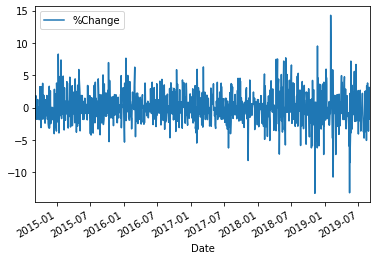

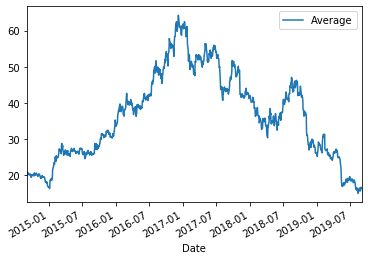

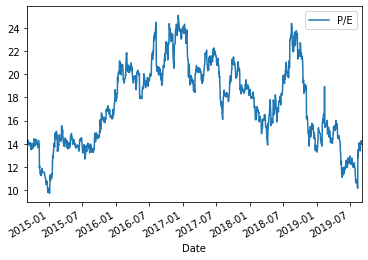

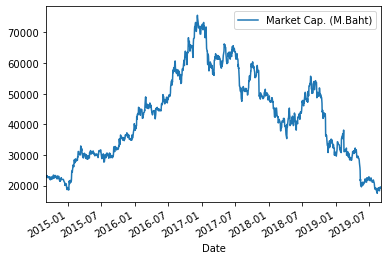

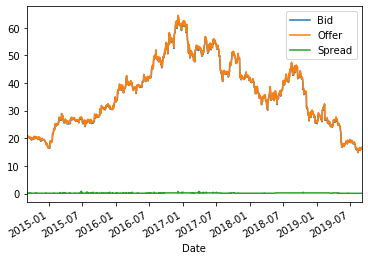

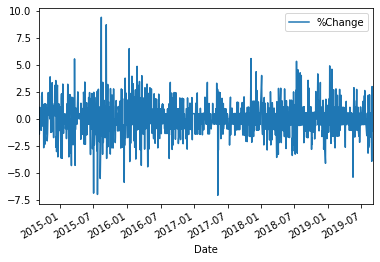

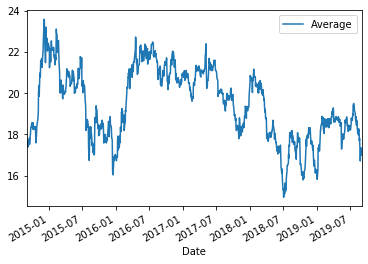

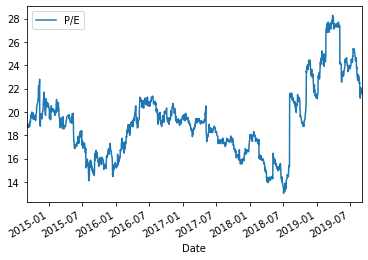

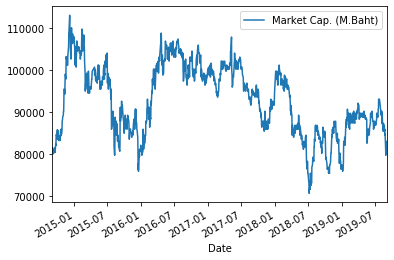

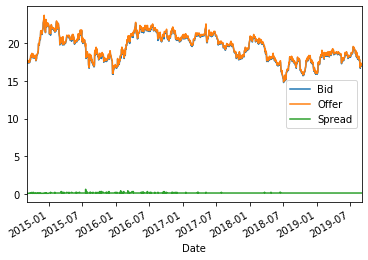

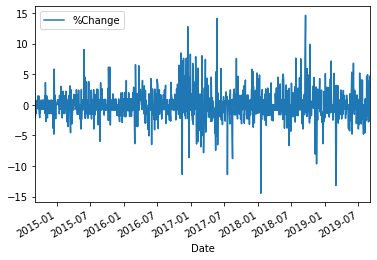

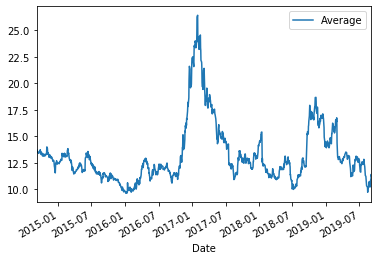

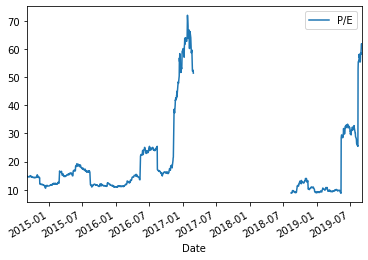

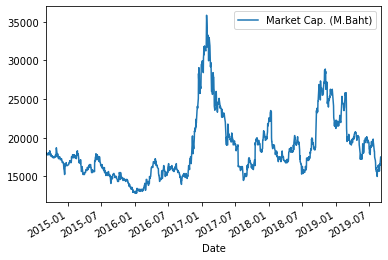

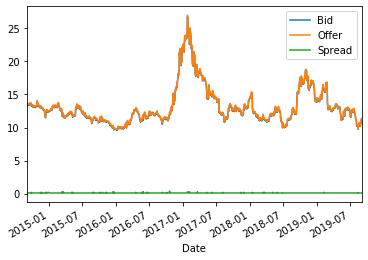

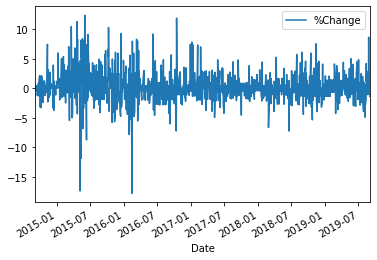

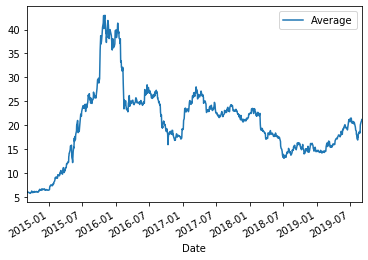

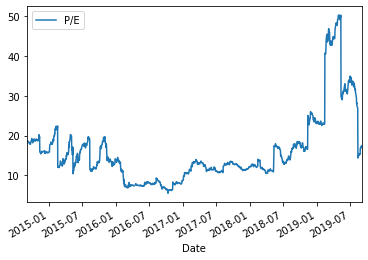

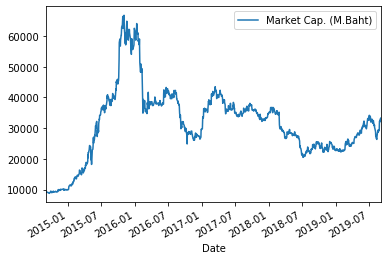

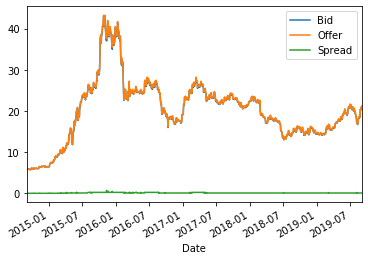

In [34]:
for s in os.listdir():
    try:
        print(s)
        ht = HistoricalTrading(s)
        ht.timeseries()
        ht.plot_all()
        print("=" * 40)    
    except FileNotFoundError as e:
        print(s, "::" , str(e))

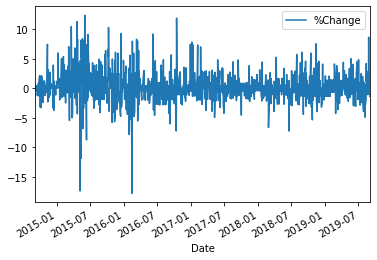

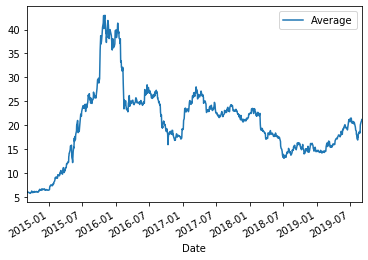

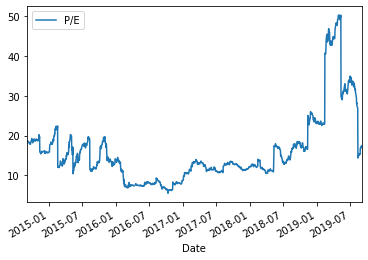

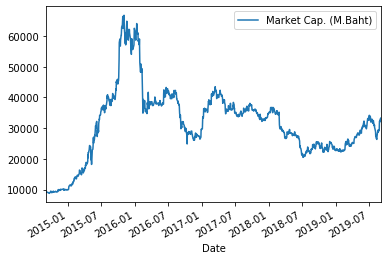

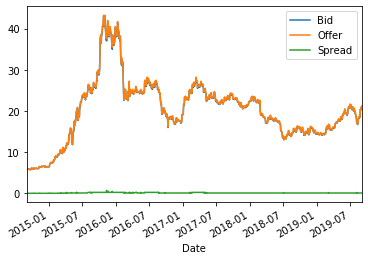

In [35]:
HistoricalTrading('TASCO').plot_all()

In [38]:
df = HistoricalTrading('TASCO').dataframe().set_index('Date')

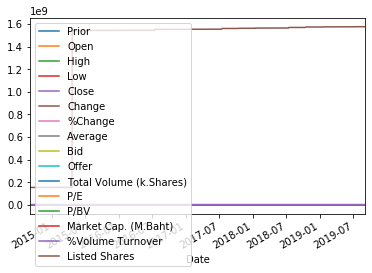

In [39]:
df.plot()